# PORTUGUESE ELECTION'S FINAL REPRESENTATIVE PREDICTION PROJECT 

In [126]:
!pip install datasist
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":[15,10]},font_scale=1.5)
from statsmodels.tsa.filters.hp_filter import hpfilter
pd.set_option("display.max_columns",None)
import statsmodels.api as sm
from datasist.structdata import detect_outliers

In [128]:
df=pd.read_csv(r"D:\download 2\ElectionData2019\GoesGold\ElectionData.csv",index_col=0,parse_dates=True)

In [129]:
df.columns

Index(['time', 'territoryName', 'totalMandates', 'availableMandates',
       'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [130]:
df1=df[["time","territoryName","totalMandates","availableMandates","numParishes","numParishesApproved","blankVotes","nullVotes","subscribedVoters","totalVoters","pre.blankVotes","pre.nullVotes","pre.subscribedVoters","pre.totalVoters","Party","Mandates","Percentage","validVotesPercentage","Votes","Hondt","FinalMandates"]]

In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21643 entries, 0 to 265
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  21643 non-null  object 
 1   territoryName         21643 non-null  object 
 2   totalMandates         21643 non-null  int64  
 3   availableMandates     21643 non-null  int64  
 4   numParishes           21643 non-null  int64  
 5   numParishesApproved   21643 non-null  int64  
 6   blankVotes            21643 non-null  int64  
 7   nullVotes             21643 non-null  int64  
 8   subscribedVoters      21643 non-null  int64  
 9   totalVoters           21643 non-null  int64  
 10  pre.blankVotes        21643 non-null  int64  
 11  pre.nullVotes         21643 non-null  int64  
 12  pre.subscribedVoters  21643 non-null  int64  
 13  pre.totalVoters       21643 non-null  int64  
 14  Party                 21643 non-null  object 
 15  Mandates             

In [132]:
df1.index.unique()

Int64Index([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
             65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
            130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
            195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
            260, 265],
           dtype='int64', name='TimeElapsed')

#### TRANSFORMATION & FEATURE ENGINEER FOR TIME COLUNM

In [133]:
df1["time"]=pd.to_datetime(df1["time"])

C:\Users\Noureen\AppData\Local\Temp\ipykernel_10796\331059453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["time"]=pd.to_datetime(df1["time"])


In [134]:
df1["year"]=df1["time"].dt.year
df1["month"]=df1["time"].dt.month
df1["day"]=df1["time"].dt.day
df1["day_name"]=df1["time"].dt.day_name()
df1["hour"]=df1["time"].dt.hour
df1["minutes"]=df1["time"].dt.minute
df1["second"]=df1["time"].dt.second

C:\Users\Noureen\AppData\Local\Temp\ipykernel_10796\16858163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["year"]=df1["time"].dt.year
C:\Users\Noureen\AppData\Local\Temp\ipykernel_10796\16858163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["month"]=df1["time"].dt.month
C:\Users\Noureen\AppData\Local\Temp\ipykernel_10796\16858163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21643 entries, 0 to 265
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  21643 non-null  datetime64[ns]
 1   territoryName         21643 non-null  object        
 2   totalMandates         21643 non-null  int64         
 3   availableMandates     21643 non-null  int64         
 4   numParishes           21643 non-null  int64         
 5   numParishesApproved   21643 non-null  int64         
 6   blankVotes            21643 non-null  int64         
 7   nullVotes             21643 non-null  int64         
 8   subscribedVoters      21643 non-null  int64         
 9   totalVoters           21643 non-null  int64         
 10  pre.blankVotes        21643 non-null  int64         
 11  pre.nullVotes         21643 non-null  int64         
 12  pre.subscribedVoters  21643 non-null  int64         
 13  pre.totalVoters   

In [136]:
df1.describe()

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,minutes,second
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000,21643.0,21643.0,21643.000000,21643.000000,21643.000000,21643.000000
mean,11.544795,11.499284,309.956013,261.090237,8875.066673,6148.068752,6.275367e+05,3.390741e+05,7608.001386,5914.629950,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138,2019.0,10.0,6.148963,18.361410,26.955136,1.497251
std,31.314567,31.738783,659.055911,583.377428,21484.874088,14735.469269,1.525590e+06,8.290404e+05,18493.107257,14236.038023,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644,0.0,0.0,0.356060,7.747974,16.623537,0.500004
min,0.000000,0.000000,54.000000,3.000000,19.000000,39.000000,5.767000e+03,2.833000e+03,32.000000,40.000000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000,2019.0,10.0,6.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,75.000000,67.000000,1188.000000,1094.000000,1.229870e+05,6.267100e+04,1130.000000,1124.000000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000,2019.0,10.0,6.000000,20.000000,15.000000,1.000000
50%,4.000000,3.000000,147.000000,120.000000,2998.000000,2232.000000,2.289540e+05,1.060120e+05,2595.000000,2141.000000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000,2019.0,10.0,6.000000,21.000000,25.000000,1.000000
75%,9.000000,9.000000,242.000000,208.000000,6889.000000,4121.000000,3.804890e+05,2.069180e+05,5929.000000,3967.000000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000,2019.0,10.0,6.000000,22.000000,40.000000,2.000000
max,226.000000,226.000000,3092.000000,3092.000000,129599.000000,88539.000000,9.343084e+06,5.092424e+06,112666.000000,86473.000000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000,2019.0,10.0,7.000000,23.000000,55.000000,2.000000


#### DETECT OUTLIERS WITH VISUALIZATION 

<AxesSubplot:xlabel='totalMandates'>

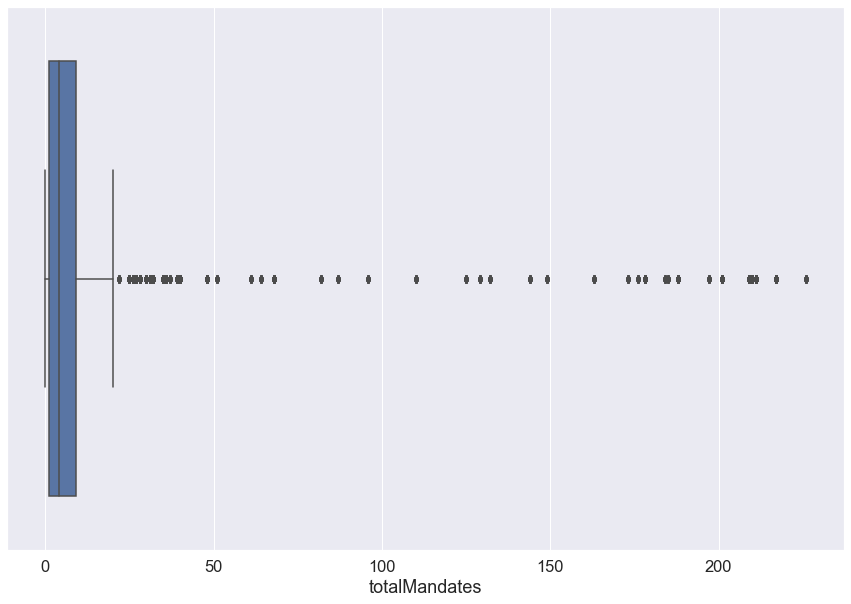

In [137]:
sns.boxplot(data=df1,x="totalMandates")

###DETECT WITH IQR

In [138]:
q3_total=df1["totalMandates"].quantile(0.75)
q1_total=df1["totalMandates"].quantile(0.25)
iqr_totalMandates=q3_total-q1_total
maximum_outliers=q3_total+1.5*iqr_totalMandates
maximum_outliers

21.0

In [139]:
df1[df1["totalMandates"]>maximum_outliers]["totalMandates"].index
# it's so hard to drop because large quantity of rows so i have to go imputation

Int64Index([ 55,  55,  55,  55,  55,  55,  55,  55,  55,  55,
            ...
            265, 265, 265, 265, 265, 265, 265, 265, 265, 265],
           dtype='int64', name='TimeElapsed', length=1826)

### detetcing outliers in "availableMandates" colunm 

<AxesSubplot:xlabel='availableMandates'>

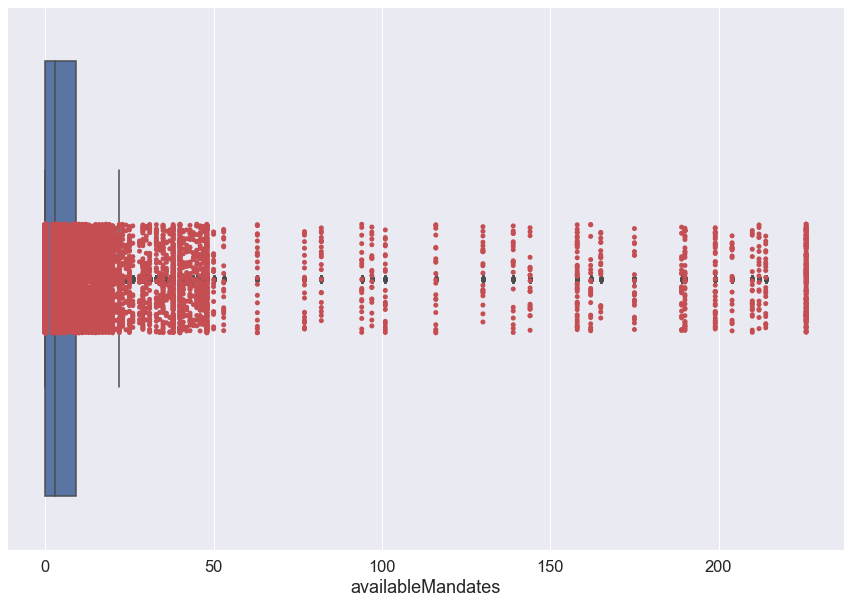

In [140]:
sns.boxplot(data=df1,x="availableMandates")
sns.stripplot(data=df1,x="availableMandates",color="r")

###DETECT OUTLIERS BY DIFFERENT TICHNIQUE

In [141]:
upper_availableMandates=df1["availableMandates"].mean()+3*df1["availableMandates"].std()
sum(df1["availableMandates"]>upper_availableMandates)


546

### detect numparishes outliers

<AxesSubplot:xlabel='numParishes'>

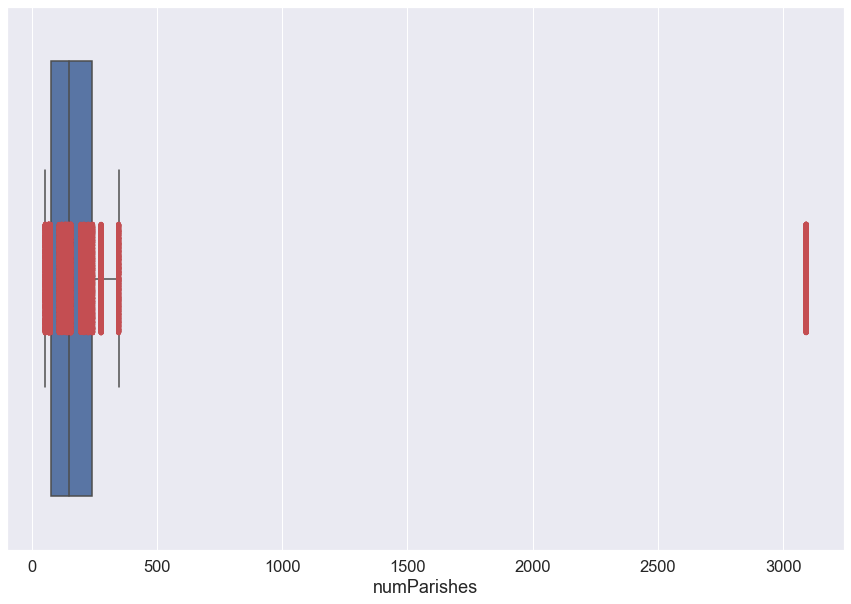

In [142]:
sns.boxplot(data=df1,x="numParishes")
sns.stripplot(data=df1,x="numParishes",color="r")

### DETECT OUTLIERS BY IQR

In [143]:
q3=df1["numParishes"].quantile(0.75)
q1=df1["numParishes"].quantile(0.25)
iqr=q3-q1
maxmum_outliers_parishes=q3+1.5*iqr
maxmum_outliers_parishes

492.5

#### detect outlier in numParishesApproved colunm

<AxesSubplot:xlabel='numParishesApproved'>

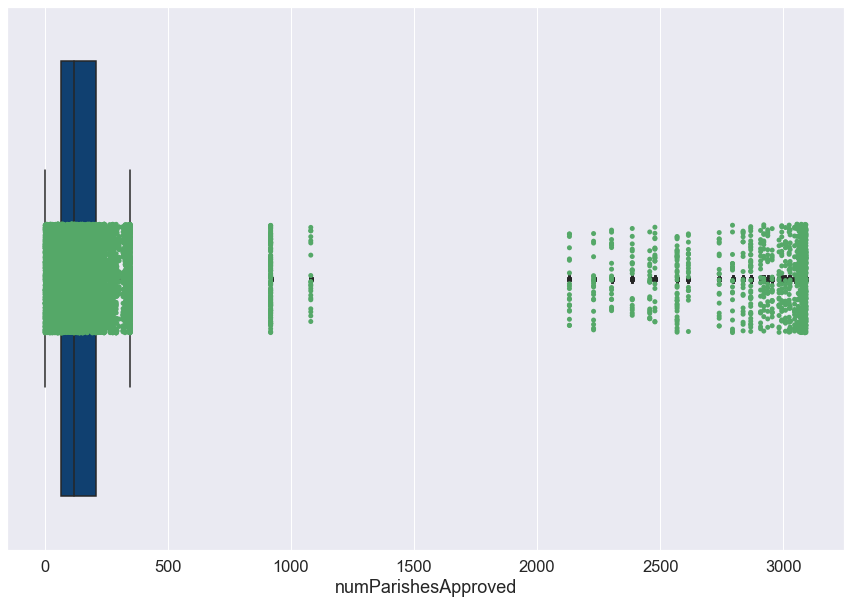

In [144]:
sns.boxplot(data=df1,x="numParishesApproved",palette="ocean")
sns.stripplot(data=df1,x="numParishesApproved",color="g")

##### detect outliers of "numParishesApproved" colunm 


In [145]:
q3_appro=df1["numParishesApproved"].quantile(0.75)
q1_appro=df1["numParishesApproved"].quantile(0.25)
iqr_approved=q3_appro-q1_appro
pre_maxoutlier=q3+1.5*iqr_approved
pre_maxoutlier

453.5

<AxesSubplot:xlabel='blankVotes'>

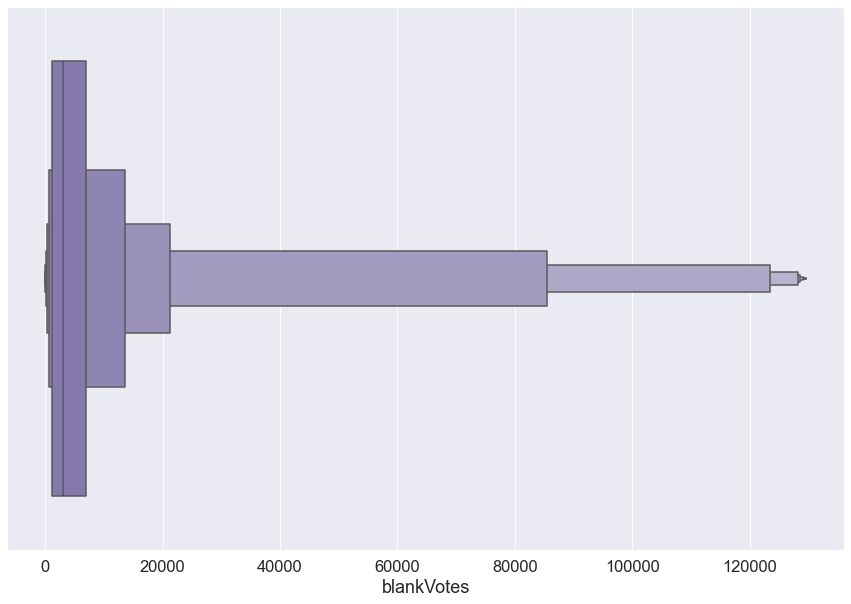

In [146]:
sns.boxenplot(data=df1,x="blankVotes",color="m")

#### detect outliers from IQR for blankVotes colunm

In [147]:
q3_blank=df1["blankVotes"].quantile(0.75)
q1_blank=df1["blankVotes"].quantile(0.25)
IQR_blank=q3_blank-q1_blank
pre_maxblank=q3+1.5*IQR_blank
pre_maxblank

8793.5

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21643 entries, 0 to 265
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  21643 non-null  datetime64[ns]
 1   territoryName         21643 non-null  object        
 2   totalMandates         21643 non-null  int64         
 3   availableMandates     21643 non-null  int64         
 4   numParishes           21643 non-null  int64         
 5   numParishesApproved   21643 non-null  int64         
 6   blankVotes            21643 non-null  int64         
 7   nullVotes             21643 non-null  int64         
 8   subscribedVoters      21643 non-null  int64         
 9   totalVoters           21643 non-null  int64         
 10  pre.blankVotes        21643 non-null  int64         
 11  pre.nullVotes         21643 non-null  int64         
 12  pre.subscribedVoters  21643 non-null  int64         
 13  pre.totalVoters   

#### detect outliers from IQR for nullvotes colunm

<AxesSubplot:xlabel='nullVotes'>

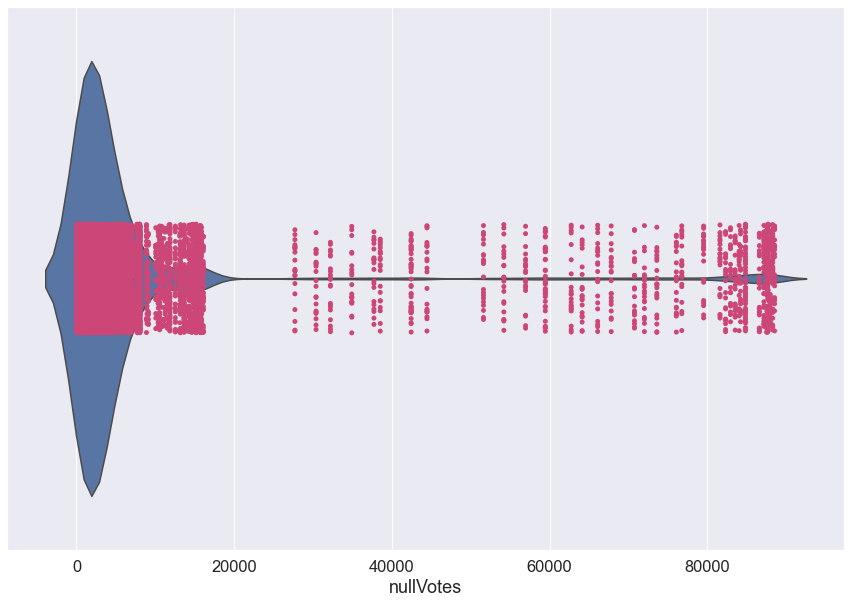

In [149]:
sns.violinplot(data=df1,x="nullVotes")
sns.stripplot(data=df1,x="nullVotes",palette="plasma")

In [150]:
df1["nullVotes"].quantile(0.75)
df1["nullVotes"].quantile(0.25)
iqr_null=df1["nullVotes"].quantile(0.75)-df1["nullVotes"].quantile(0.25)
iqr_null
pre_maxout_null=df1["nullVotes"].quantile(0.75)+1.5*iqr_null
pre_maxout_null

8661.5

In [151]:
df1.describe()

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,minutes,second
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000,21643.0,21643.0,21643.000000,21643.000000,21643.000000,21643.000000
mean,11.544795,11.499284,309.956013,261.090237,8875.066673,6148.068752,6.275367e+05,3.390741e+05,7608.001386,5914.629950,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138,2019.0,10.0,6.148963,18.361410,26.955136,1.497251
std,31.314567,31.738783,659.055911,583.377428,21484.874088,14735.469269,1.525590e+06,8.290404e+05,18493.107257,14236.038023,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644,0.0,0.0,0.356060,7.747974,16.623537,0.500004
min,0.000000,0.000000,54.000000,3.000000,19.000000,39.000000,5.767000e+03,2.833000e+03,32.000000,40.000000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000,2019.0,10.0,6.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,75.000000,67.000000,1188.000000,1094.000000,1.229870e+05,6.267100e+04,1130.000000,1124.000000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000,2019.0,10.0,6.000000,20.000000,15.000000,1.000000
50%,4.000000,3.000000,147.000000,120.000000,2998.000000,2232.000000,2.289540e+05,1.060120e+05,2595.000000,2141.000000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000,2019.0,10.0,6.000000,21.000000,25.000000,1.000000
75%,9.000000,9.000000,242.000000,208.000000,6889.000000,4121.000000,3.804890e+05,2.069180e+05,5929.000000,3967.000000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000,2019.0,10.0,6.000000,22.000000,40.000000,2.000000
max,226.000000,226.000000,3092.000000,3092.000000,129599.000000,88539.000000,9.343084e+06,5.092424e+06,112666.000000,86473.000000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000,2019.0,10.0,7.000000,23.000000,55.000000,2.000000


#### detect outliers for subscribedvotes colunm

<AxesSubplot:xlabel='subscribedVoters'>

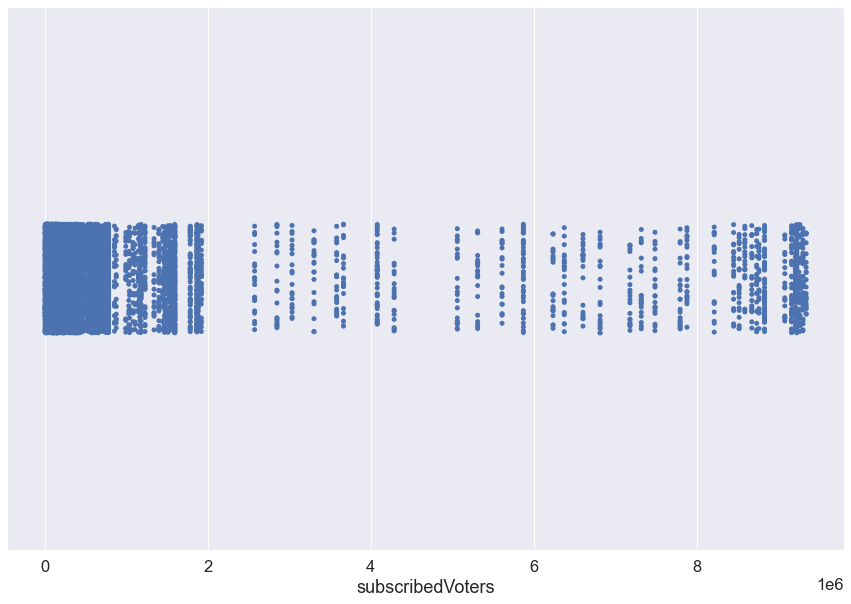

In [152]:
sns.stripplot(data=df1,x="subscribedVoters")

In [153]:
upper_subscribedVoters=df1["subscribedVoters"].mean()+3*df1["subscribedVoters"].std()

#### detect outliers by distribution technique for totalvoters colunm

<AxesSubplot:xlabel='totalVoters'>

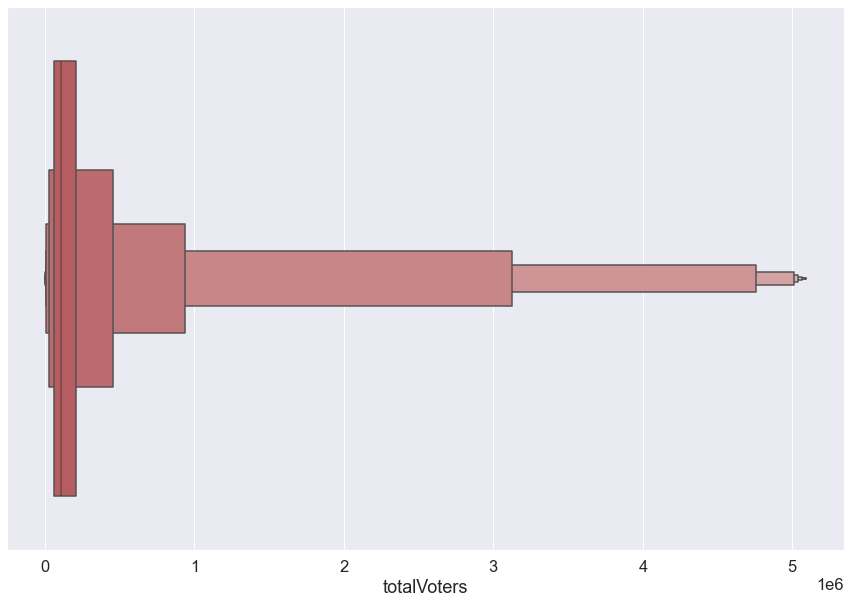

In [154]:
sns.boxenplot(data=df1,x="totalVoters",color="r")

In [155]:
upper_totalvo=df1["totalVoters"].mean()+3*df1["totalVoters"].std()

#### detect outliers  for last blankVotes colunm

<AxesSubplot:xlabel='pre.blankVotes'>

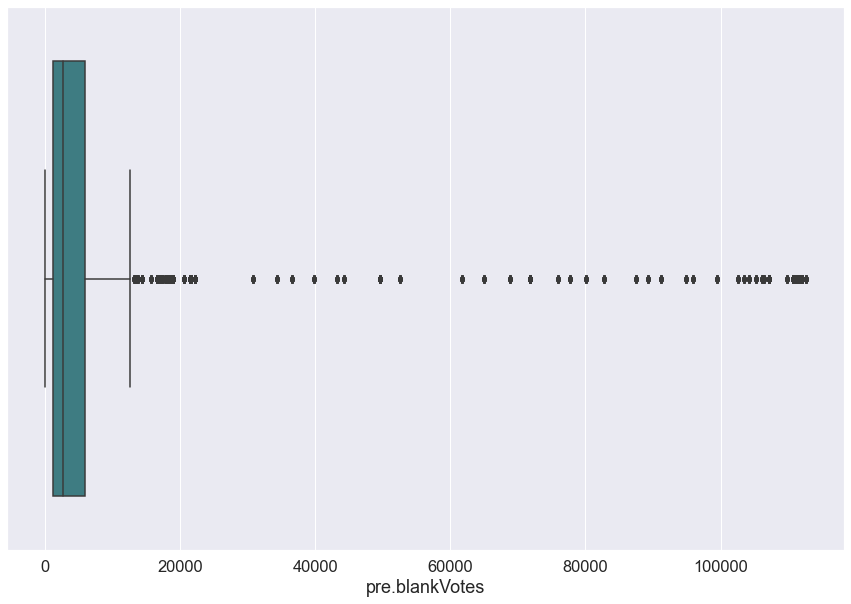

In [156]:
sns.boxplot(data=df1,x=df1["pre.blankVotes"],palette="crest")

In [157]:
q1_preblank=df1["pre.blankVotes"].quantile(0.25)
q3_preblank=df1["pre.blankVotes"].quantile(0.75)
iqr_preblank=q3_preblank-q1_preblank
upper_pre_blank=q3_preblank+1.5*iqr_preblank



#### detect outliers for last nullVotes colunm

<AxesSubplot:xlabel='pre.nullVotes'>

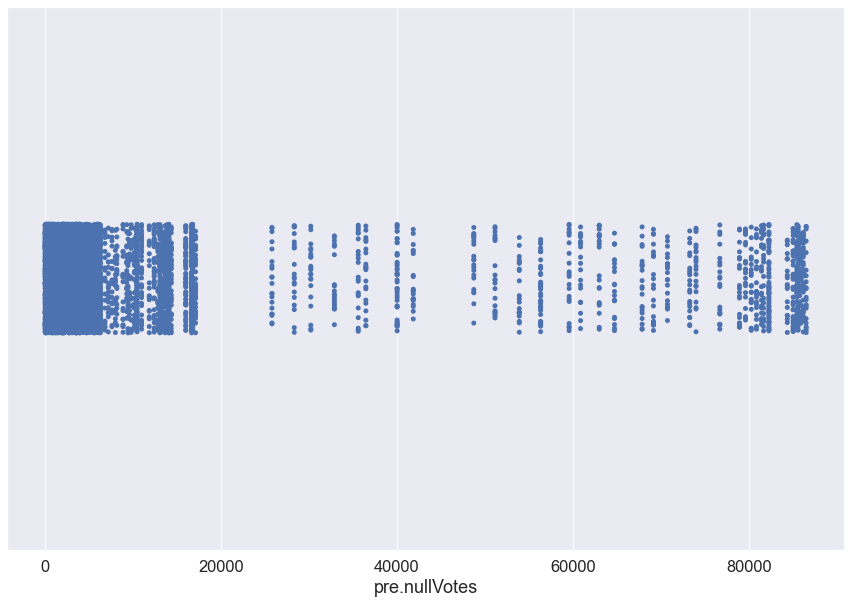

In [158]:
sns.stripplot(data=df1,x=df1["pre.nullVotes"])

In [159]:
q1_prenull=df1["pre.nullVotes"].quantile(0.25)
q3_prenull=df1["pre.nullVotes"].quantile(0.75)
iqr_prenull=q3_prenull-q1_prenull
upper_prenullVotes=q3_prenull+1.5*iqr_prenull


#### detect outliers for last subscribedVotes colunm

<AxesSubplot:xlabel='pre.subscribedVoters'>

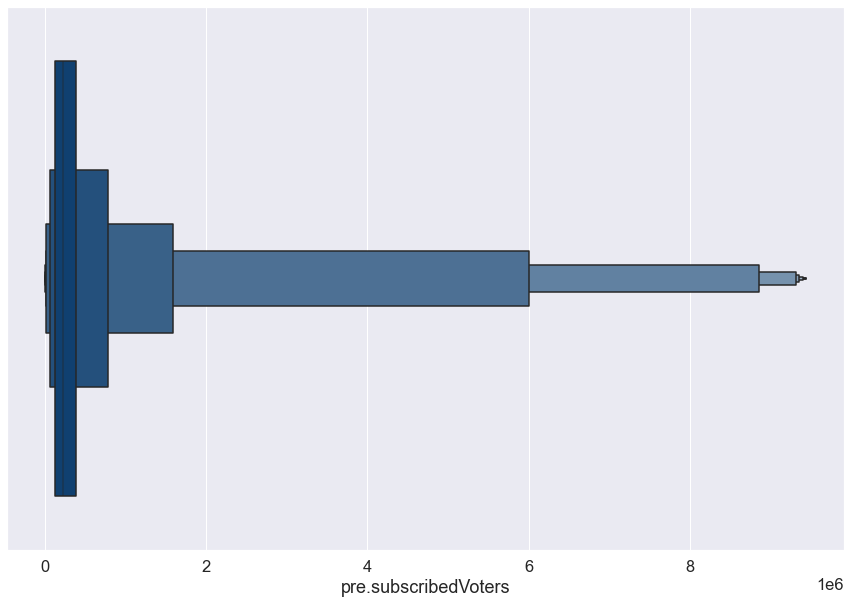

In [160]:
sns.boxenplot(data=df1,x=df1["pre.subscribedVoters"],palette="ocean")

In [161]:
q3_pre_subcribedvotes=df1["pre.subscribedVoters"].quantile(0.75)
q1_pre_subscribedVoters=df1["pre.subscribedVoters"].quantile(0.25)	
iqr_pre_subscribedVoters=q3_pre_subcribedvotes-q1_pre_subscribedVoters
upper_pre_subscribedVoters=q3_pre_subcribedvotes+1.5*iqr_pre_subscribedVoters
upper_pre_subscribedVoters

789896.0

#### detect outliers by detect outliers for last totalvoters colunm

In [162]:
index_out_totalvoters=detect_outliers(df1,0,["pre.totalVoters"])

c:\ProgramData\Anaonda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pre.totalVoters'>

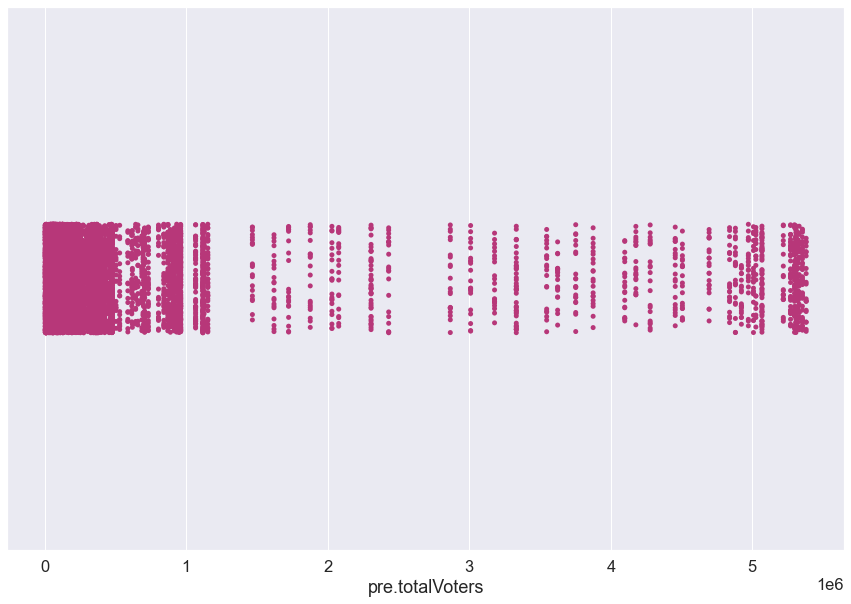

In [163]:
sns.stripplot(df1["pre.totalVoters"],palette="magma")

In [164]:
upper_pre_totalvoters=df1.loc[index_out_totalvoters]["pre.totalVoters"].sort_values(ascending=False).iloc[265]
upper_pre_totalvoters

5219018

In [165]:
df1["Mandates"].describe()

count    21643.000000
mean         0.565495
std          4.421804
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        106.000000
Name: Mandates, dtype: float64

<AxesSubplot:xlabel='Mandates'>

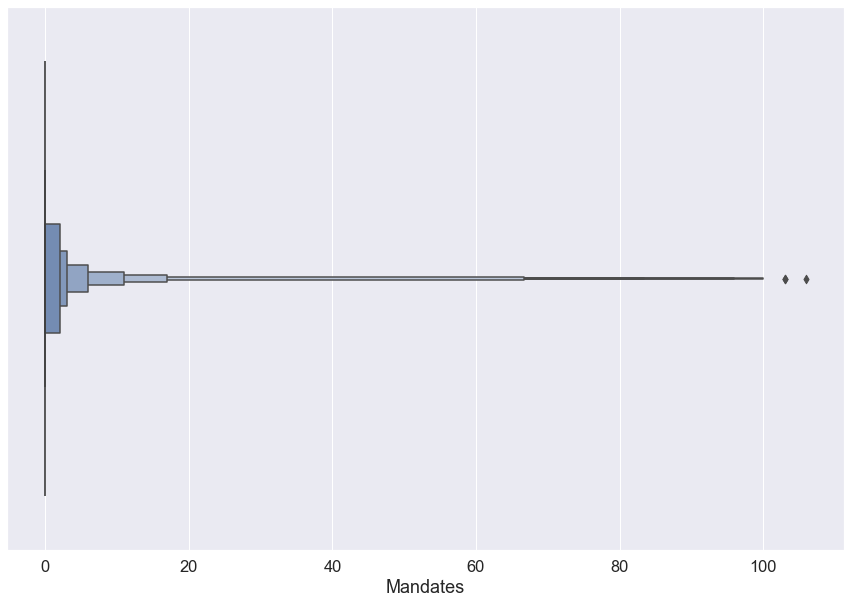

In [166]:
sns.boxenplot(data=df1,x="Mandates")

#### detect outliers by distribution technique for votes of party representatives column colunm

<AxesSubplot:xlabel='Votes'>

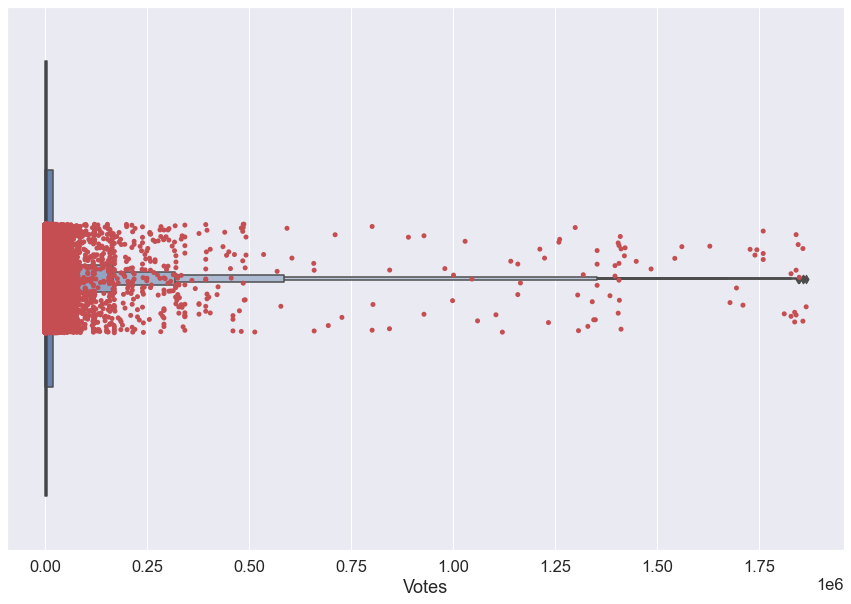

In [167]:
sns.boxenplot(data=df1,x="Votes")
sns.stripplot(data=df1,x="Votes",color="r")


In [168]:
upper_votes=df1["Votes"].mean()+3*df1["Votes"].std()


#### detect outliers by detect outliers for Hondt( number of deputies according to distribution votes ) colunm

<AxesSubplot:xlabel='Hondt'>

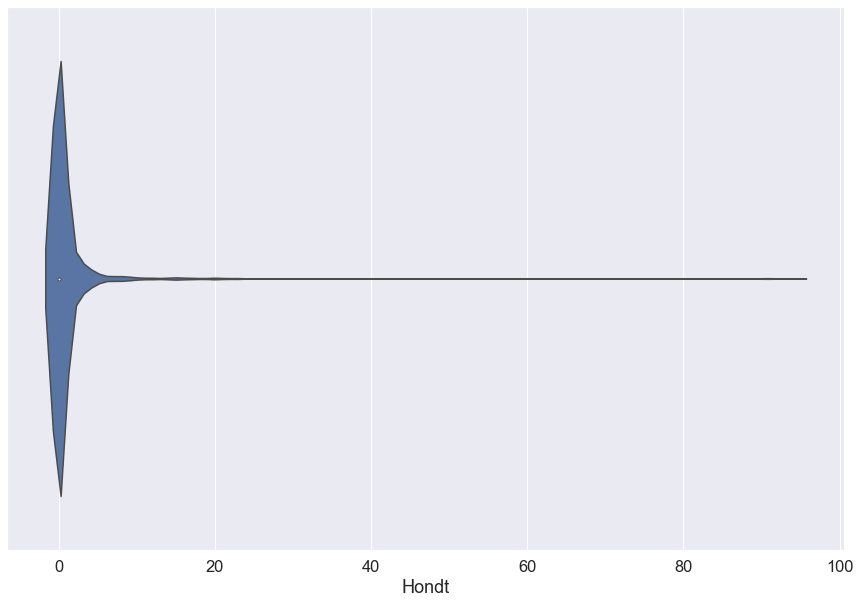

In [169]:
sns.violinplot(data=df1,x="Hondt")

In [170]:
index_out_Hondt=detect_outliers(df1,0,["Hondt"])

In [171]:
up_hondt=df.loc[index_out_Hondt,"Hondt"].sort_values(ascending=False).iloc[0]

#### detect outliers by detect outliers function for final representative for each city

c:\ProgramData\Anaonda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

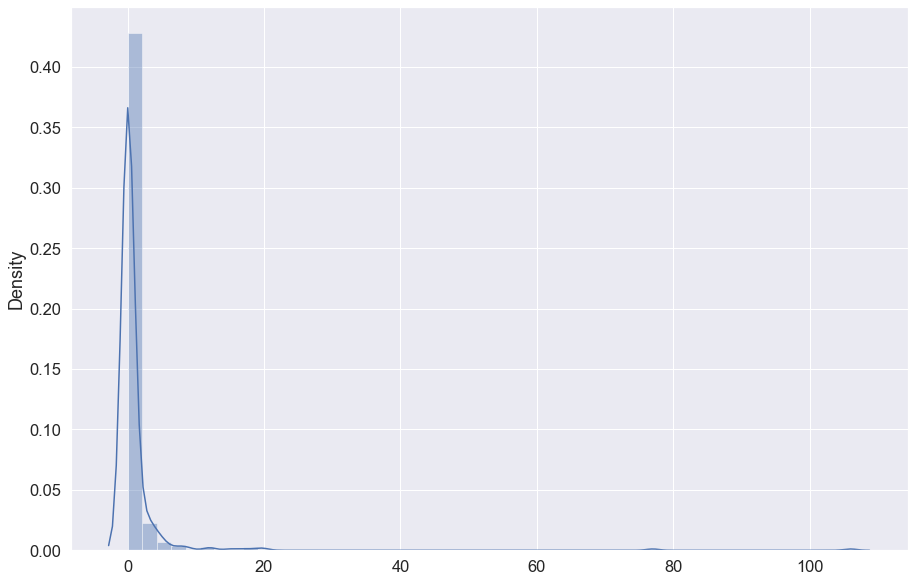

In [172]:
sns.distplot(x=df1["FinalMandates"])

In [173]:
index_finalMandates=detect_outliers(df1,0,["FinalMandates"])

In [174]:
out_final=df1.loc[index_finalMandates,"FinalMandates"].sort_values(ascending=False).iloc[0]
out_final

106

### detect missing values 

In [175]:
df1.isna().sum()

time                    0
territoryName           0
totalMandates           0
availableMandates       0
numParishes             0
numParishesApproved     0
blankVotes              0
nullVotes               0
subscribedVoters        0
totalVoters             0
pre.blankVotes          0
pre.nullVotes           0
pre.subscribedVoters    0
pre.totalVoters         0
Party                   0
Mandates                0
Percentage              0
validVotesPercentage    0
Votes                   0
Hondt                   0
FinalMandates           0
year                    0
month                   0
day                     0
day_name                0
hour                    0
minutes                 0
second                  0
dtype: int64

#### detect duplicated records

In [176]:
df1.duplicated().sum()

0

In [177]:
df1.head()

,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,day_name,hour,minutes,second
TimeElapsed,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PS,0,38.29,40.22,147993,94,106,2019,10,6,Sunday,20,10,2
0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019,10,6,Sunday,20,10,2
0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019,10,6,Sunday,20,10,2
0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019,10,6,Sunday,20,10,2
0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019,10,6,Sunday,20,10,2


In [178]:
df2=df1.set_index("time")

In [179]:
df2.index.unique()

DatetimeIndex(['2019-10-06 20:10:02', '2019-10-06 20:15:02',
               '2019-10-06 20:20:02', '2019-10-06 20:25:02',
               '2019-10-06 20:30:02', '2019-10-06 20:35:02',
               '2019-10-06 20:40:02', '2019-10-06 20:45:02',
               '2019-10-06 20:50:01', '2019-10-06 20:55:01',
               '2019-10-06 21:00:01', '2019-10-06 21:05:01',
               '2019-10-06 21:10:01', '2019-10-06 21:15:02',
               '2019-10-06 21:20:02', '2019-10-06 21:25:02',
               '2019-10-06 21:30:01', '2019-10-06 21:35:01',
               '2019-10-06 21:40:02', '2019-10-06 21:45:02',
               '2019-10-06 21:50:01', '2019-10-06 21:55:01',
               '2019-10-06 22:00:02', '2019-10-06 22:05:02',
               '2019-10-06 22:10:01', '2019-10-06 22:15:01',
               '2019-10-06 22:20:02', '2019-10-06 22:25:01',
               '2019-10-06 22:30:01', '2019-10-06 22:35:01',
               '2019-10-06 22:40:02', '2019-10-06 22:45:01',
               '2019-10-

In [180]:
df2["actual_votes_currently"]=df2["nullVotes"]+df2["blankVotes"]+df2["subscribedVoters"]

In [181]:
df2["last_actual_votes"]=df2["pre.nullVotes"]+df2["pre.blankVotes"]+df2["pre.subscribedVoters"]

## EDA

- WHICH CITY HAS THE LARGEST NUMBER OF MS's (REPRESENTATIVE) AT THE MOMENT ?

In [182]:
df2.groupby("territoryName").mean().sort_values(by="totalMandates",ascending=False)["totalMandates"]

territoryName
Território Nacional    113.388889
Porto                   19.203704
Lisboa                  16.592593
Braga                   11.962963
Aveiro                   7.944444
Santarém                 5.666667
Viseu                    5.518519
Faro                     5.314815
Leiria                   5.259259
Coimbra                  5.074074
Setúbal                  5.055556
Viana do Castelo         4.148148
Madeira                  3.814815
Açores                   3.319149
Vila Real                3.296296
Castelo Branco           2.555556
Beja                     2.277778
Guarda                   2.000000
Évora                    1.777778
Bragança                 1.611111
Portalegre               1.296296
Name: totalMandates, dtype: float64

In [183]:
data1=df2.groupby("territoryName").mean().sort_values(by="totalMandates",ascending=False)

[Text(0.5, 1.0, 'THE CITIES WHICH HAVE THE LARGEST NUMBER OF DEPUTIES')]

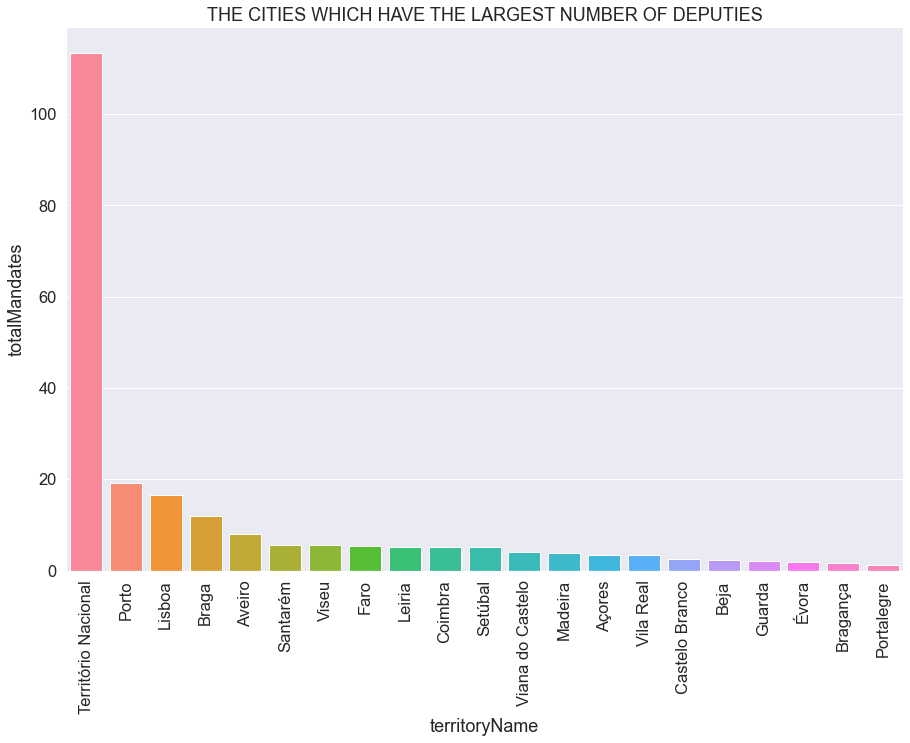

In [184]:
plt.xticks(rotation=90)
sns.barplot(data=data1,x=data1.index,y=data1["totalMandates"],saturation=1).set(title="THE CITIES WHICH HAVE THE LARGEST NUMBER OF DEPUTIES")

In [185]:
nacional_df=df2[df2["territoryName"]=="Território Nacional"]

- IS THERE A RELATIONSHIP BETWEEN NUMBER OF PARISHES AND NUMBER OF DEPUTIES AT THE MOMENT ?

<AxesSubplot:xlabel='totalMandates', ylabel='numParishesApproved'>

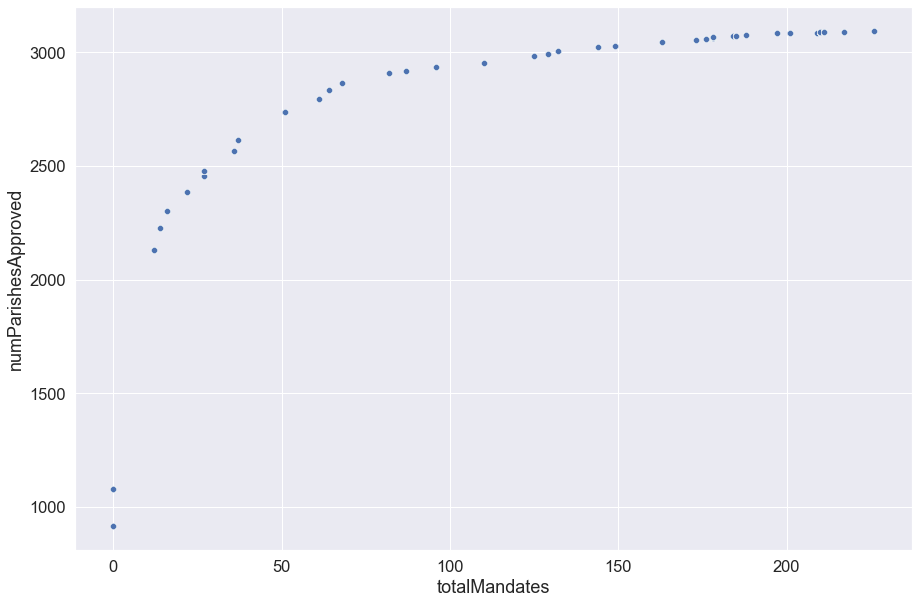

In [186]:
sns.scatterplot(data=nacional_df,x=nacional_df["totalMandates"],y=nacional_df["numParishesApproved"])

- it turned out that sectarianism doesn't relate with total representative because of the majority of people are catholic

In [187]:
nacional_df.groupby("Party").mean().sort_values(by="Votes",ascending=False)["Votes"]

Party
PS           1.229864e+06
PPD/PSD      9.591507e+05
B.E.         3.115132e+05
PCP-PEV      2.031602e+05
CDS-PP       1.446694e+05
PAN          1.012794e+05
CH           4.180689e+04
IL           3.642306e+04
L            3.179950e+04
R.I.R.       2.428087e+04
A            2.397991e+04
PCTP/MRPP    2.263619e+04
PNR          9.515741e+03
JPP          7.683370e+03
MPT          7.524426e+03
NC           7.210241e+03
PURP         6.835574e+03
PDR          6.314519e+03
PPM          5.223704e+03
PTP          5.182259e+03
MAS          1.856537e+03
Name: Votes, dtype: float64


- DID THIS CITY "Território Nacional" SUPPORTTED BY ANY PARTY AS A POLITICAL SUPPORTING ?

<AxesSubplot:xlabel='totalMandates', ylabel='Votes'>

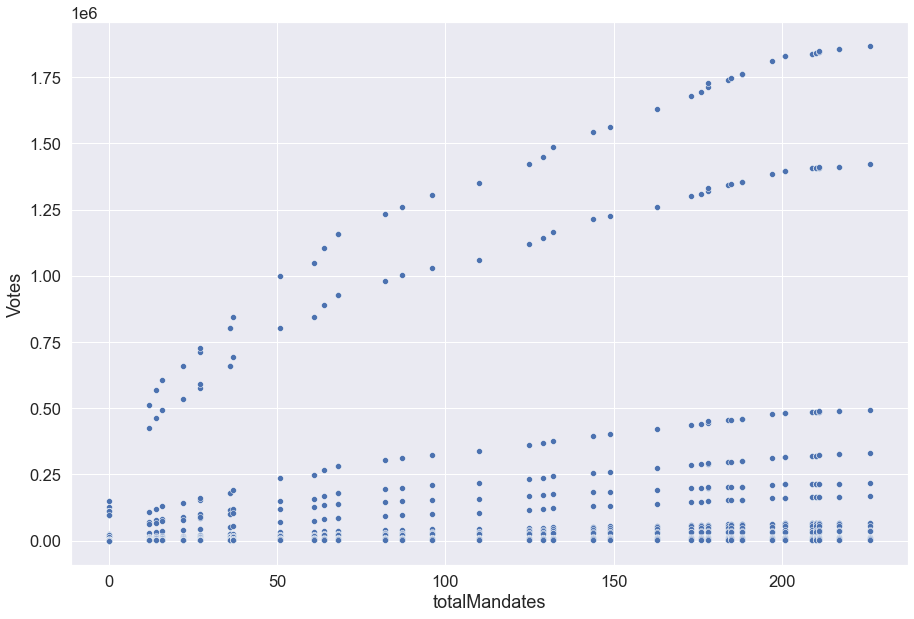

In [188]:
sns.scatterplot(data=nacional_df,x=nacional_df["totalMandates"],y=nacional_df["Votes"])

actually it's noticeable that parties oftenly support their followers and related with representatives by positive correlation

- WHAT IS THE DOMINANT PARTY IN THIS CITY "Território Nacional" WHICH HAD THE LARGEST NUMBER OF REPRESENTATIVE AT THE MOMENT ? WILL THAT EFFECT ON FINAL MANDATES (MY TARGET) ? 

In [189]:
dominant_party=nacional_df.groupby("Party").mean().sort_values(by="Votes",ascending=False)[["Votes","FinalMandates"]]
dominant_party

,Votes,FinalMandates
Party,,
PS,1.229864e+06,106.0
PPD/PSD,9.591507e+05,77.0
B.E.,3.115132e+05,19.0
PCP-PEV,2.031602e+05,12.0
CDS-PP,1.446694e+05,5.0
PAN,1.012794e+05,4.0
CH,4.180689e+04,1.0
IL,3.642306e+04,1.0
L,3.179950e+04,1.0


[Text(0.5, 1.0, "RELATIONSHIP BETWEEN EACH PARTY AND IT'S VOTES ")]

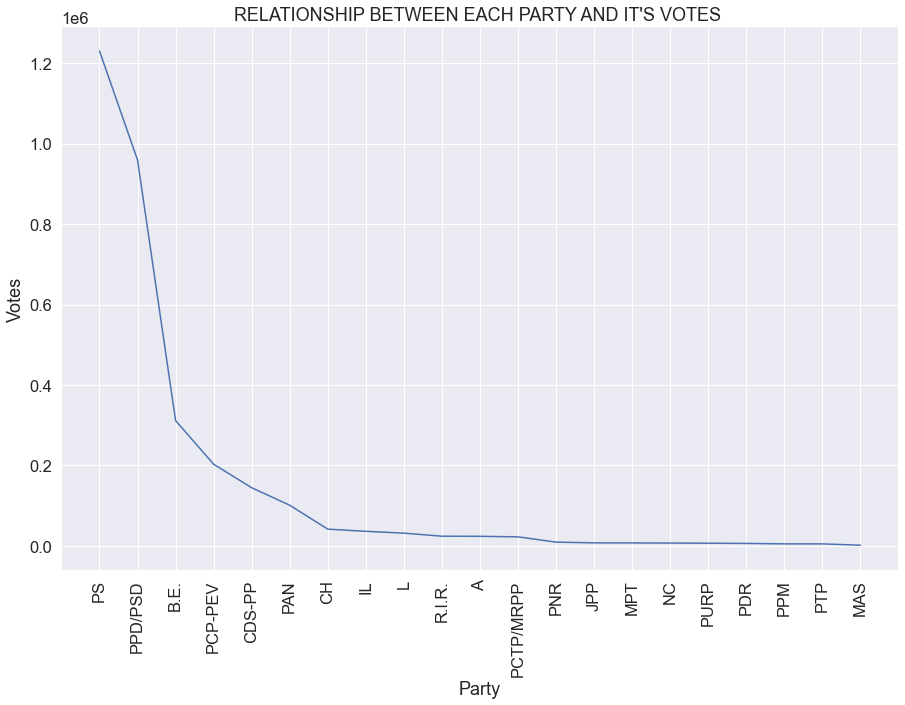

In [190]:
plt.xticks(rotation=90)
sns.lineplot(data=dominant_party,x=dominant_party.index,y=dominant_party["Votes"]).set(title="RELATIONSHIP BETWEEN EACH PARTY AND IT'S VOTES ")

- DID THE DOMINANT PARTY VOTES AFFECT ON FINAL MANDATES ?

[Text(0.5, 1.0, "RELATIONSHIP BETWEEN PARTY'S VOTES AND FINALMANDATES")]

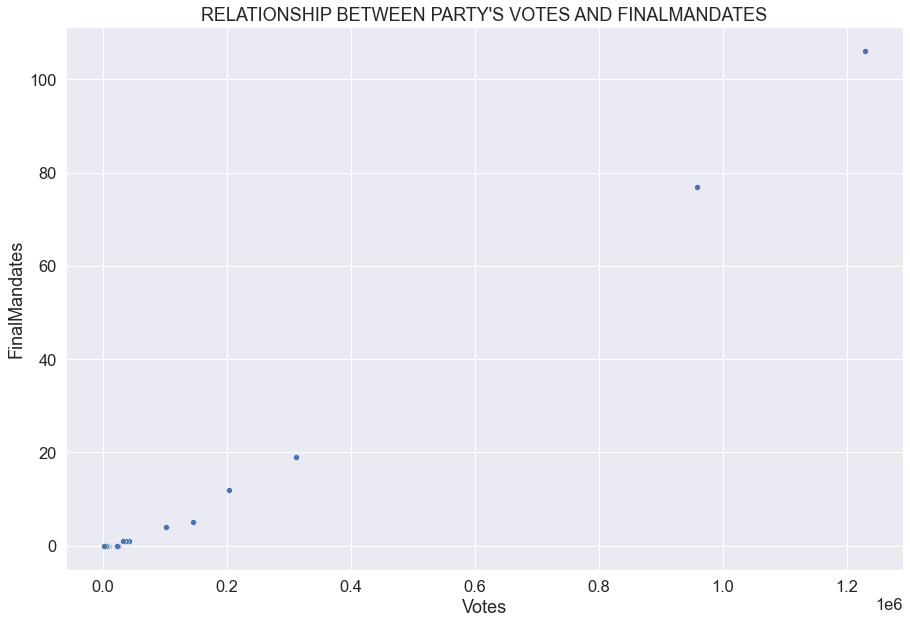

In [191]:
sns.scatterplot(data=dominant_party,x="Votes",y="FinalMandates").set(title="RELATIONSHIP BETWEEN PARTY'S VOTES AND FINALMANDATES")

although PS party has the largest number of votes but this will not affected on final mandates 

- WHAT DAY WAS THE VOTE THE LARGEST?

[Text(0.5, 1.0, 'ACTUAL VOTES DURING 2 DAYS')]

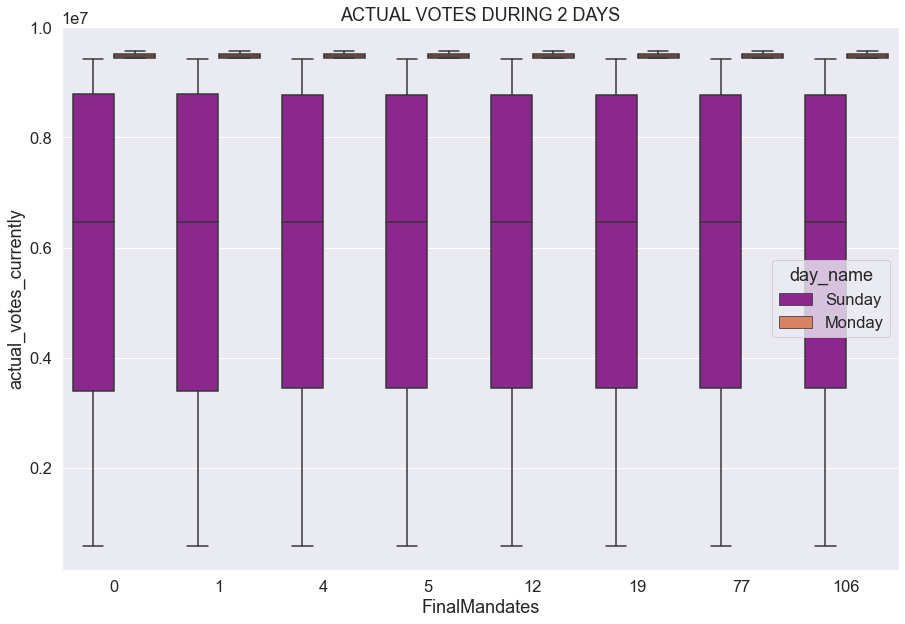

In [192]:
sns.boxplot(data=nacional_df,x="FinalMandates",y="actual_votes_currently",hue="day_name",palette="plasma").set(title="ACTUAL VOTES DURING 2 DAYS")

-it's noticeable that turning out to vote was the fisrt day (sunday) in Território Nacional

- DID VOTING CHANG EVERY FIVE MINUTES 

In [193]:
changed_minutes=nacional_df.groupby("minutes").mean()
changed_minutes[["Votes","FinalMandates","actual_votes_currently","last_actual_votes"]].sort_values(by="actual_votes_currently",ascending=False)

,Votes,FinalMandates,actual_votes_currently,last_actual_votes
minutes,,,,
5,169186.333333,10.761905,7060561.00,7158804.00
0,166155.023810,10.761905,6934561.50,7032387.75
55,162141.202381,10.761905,6772016.25,6868897.50
50,160054.702381,10.761905,6684370.75,6780877.00
35,156730.200000,10.761905,6522745.00,6605309.40
30,149813.657143,10.761905,6242616.40,6327332.80
25,147843.990476,10.761905,6165512.40,6250493.80
20,146963.019048,10.761905,6129706.20,6215162.20
45,144427.714286,10.761905,6031622.00,6113512.00


<AxesSubplot:xlabel='minutes', ylabel='actual_votes_currently'>

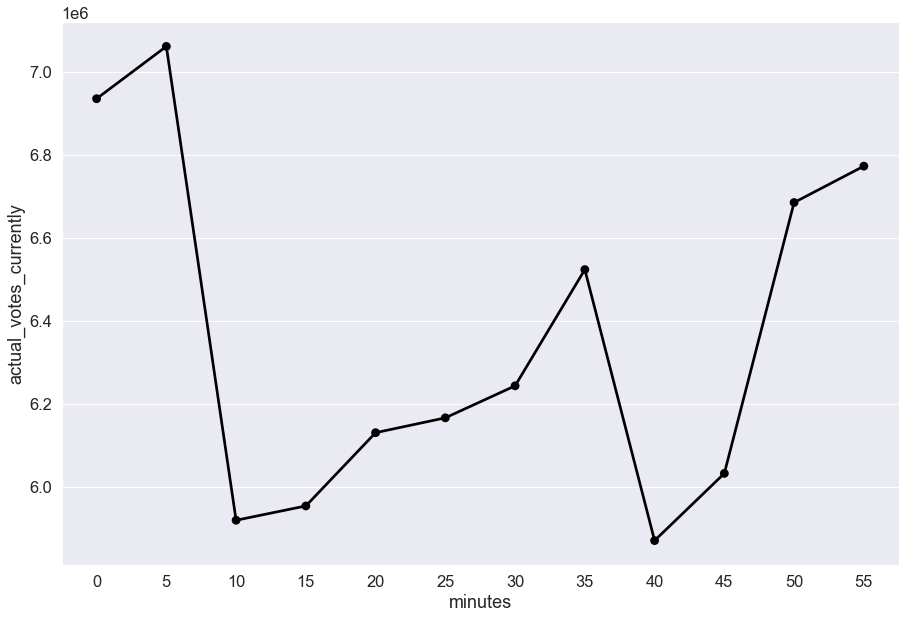

In [194]:
sns.pointplot(data=changed_minutes,x=changed_minutes.index,y="actual_votes_currently",color="black")

-it's a noticeable actual votes reached the highest level in the minute "5" and the least votes was the minute "40" 

- DID THE LAST ELECTION VOTING REACHE TO THE HIGHEST LEVEL IN THE SAME MINUTE ?

In [195]:
changed_minutes[["Votes","FinalMandates","actual_votes_currently","last_actual_votes"]].sort_values(by="last_actual_votes",ascending=False)

,Votes,FinalMandates,actual_votes_currently,last_actual_votes
minutes,,,,
5,169186.333333,10.761905,7060561.00,7158804.00
0,166155.023810,10.761905,6934561.50,7032387.75
55,162141.202381,10.761905,6772016.25,6868897.50
50,160054.702381,10.761905,6684370.75,6780877.00
35,156730.200000,10.761905,6522745.00,6605309.40
30,149813.657143,10.761905,6242616.40,6327332.80
25,147843.990476,10.761905,6165512.40,6250493.80
20,146963.019048,10.761905,6129706.20,6215162.20
45,144427.714286,10.761905,6031622.00,6113512.00


<AxesSubplot:xlabel='minutes', ylabel='last_actual_votes'>

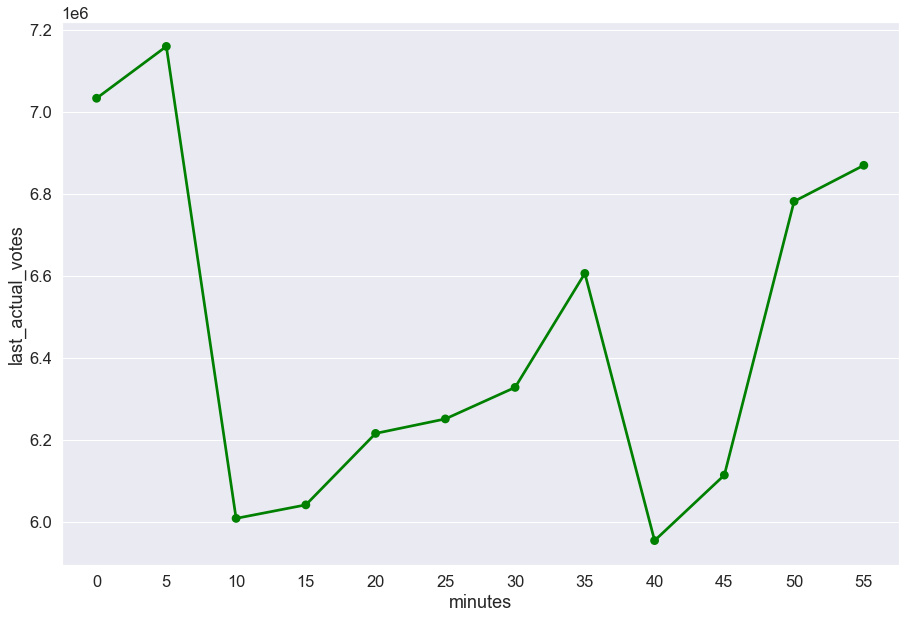

In [196]:
sns.pointplot(data=changed_minutes,x=changed_minutes.index,y="last_actual_votes",color="green")

-the last election reached the highest level in the first five minutes 

- WHICH MOMENT VOTES OF PARTY REACHED TO THE HIGEST LEVEL ? 

In [197]:
nacional_df.index.unique()

DatetimeIndex(['2019-10-06 20:10:02', '2019-10-06 20:15:02',
               '2019-10-06 20:20:02', '2019-10-06 20:25:02',
               '2019-10-06 20:30:02', '2019-10-06 20:35:02',
               '2019-10-06 20:40:02', '2019-10-06 20:45:02',
               '2019-10-06 20:50:01', '2019-10-06 20:55:01',
               '2019-10-06 21:00:01', '2019-10-06 21:05:01',
               '2019-10-06 21:10:01', '2019-10-06 21:15:02',
               '2019-10-06 21:20:02', '2019-10-06 21:25:02',
               '2019-10-06 21:30:01', '2019-10-06 21:35:01',
               '2019-10-06 21:40:02', '2019-10-06 21:45:02',
               '2019-10-06 21:50:01', '2019-10-06 21:55:01',
               '2019-10-06 22:00:02', '2019-10-06 22:05:02',
               '2019-10-06 22:10:01', '2019-10-06 22:15:01',
               '2019-10-06 22:20:02', '2019-10-06 22:25:01',
               '2019-10-06 22:30:01', '2019-10-06 22:35:01',
               '2019-10-06 22:40:02', '2019-10-06 22:45:01',
               '2019-10-

In [198]:
len(nacional_df.loc["2019-10-06 20:10:02",:])

21

[Text(0.5, 1.0, 'VOTES OF Território Nacional EVERY FIVE MINUTES')]

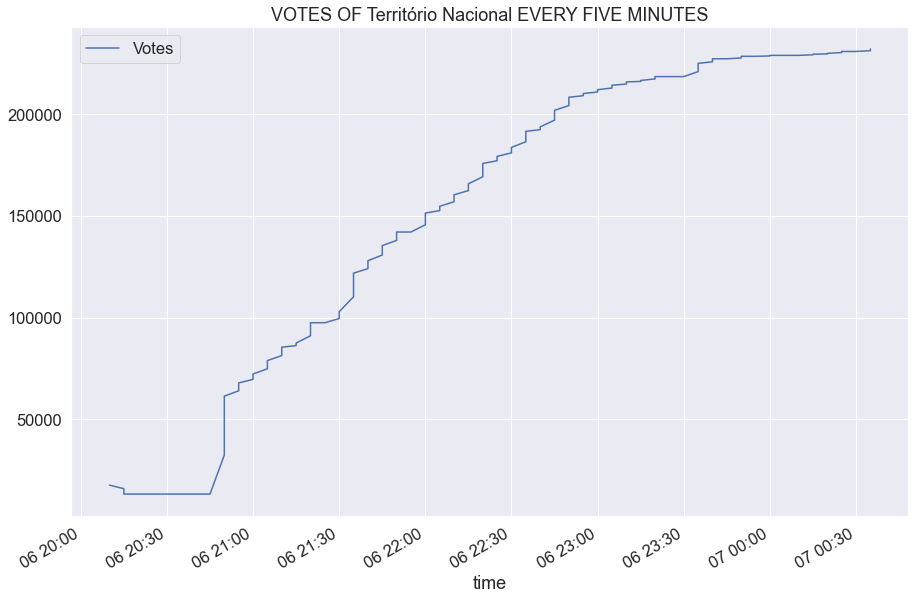

In [199]:
nacional_df[["Votes"]].rolling(21).mean().plot().set(title="VOTES OF Território Nacional EVERY FIVE MINUTES")

- party votes reached to the highest level between [12:00] to [12:30] 

- DID ACTUAL VOTING CHANGE EVERY 5 MINUTES IN Território Nacional ?

[Text(0.5, 1.0, 'AVERAGE LAST VOTING IN Território Nacional')]

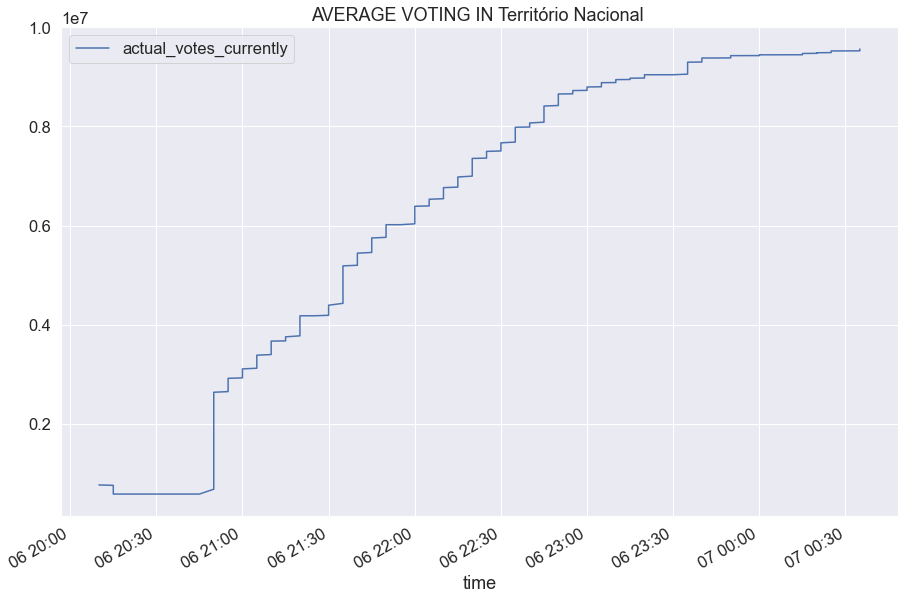

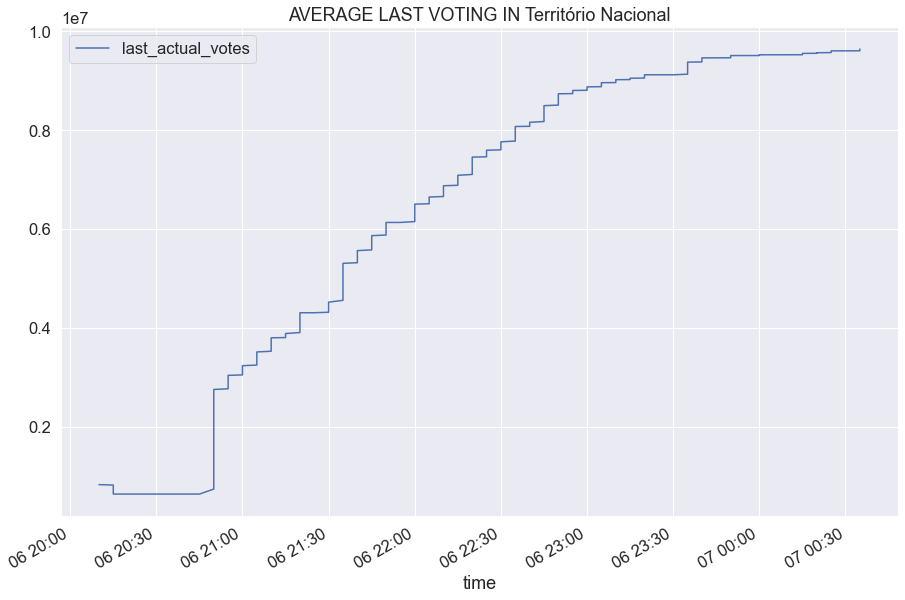

In [200]:
nacional_df[["actual_votes_currently"]].rolling(21).mean().plot().set(title="AVERAGE VOTING IN Território Nacional ")
nacional_df[["last_actual_votes"]].rolling(21).mean().plot().set(title="AVERAGE LAST VOTING IN Território Nacional")

[Text(0.5, 1.0, 'AVERAGE (TARGET) FINALMANDATES OF Território Nacional DURING 4 HOURS')]

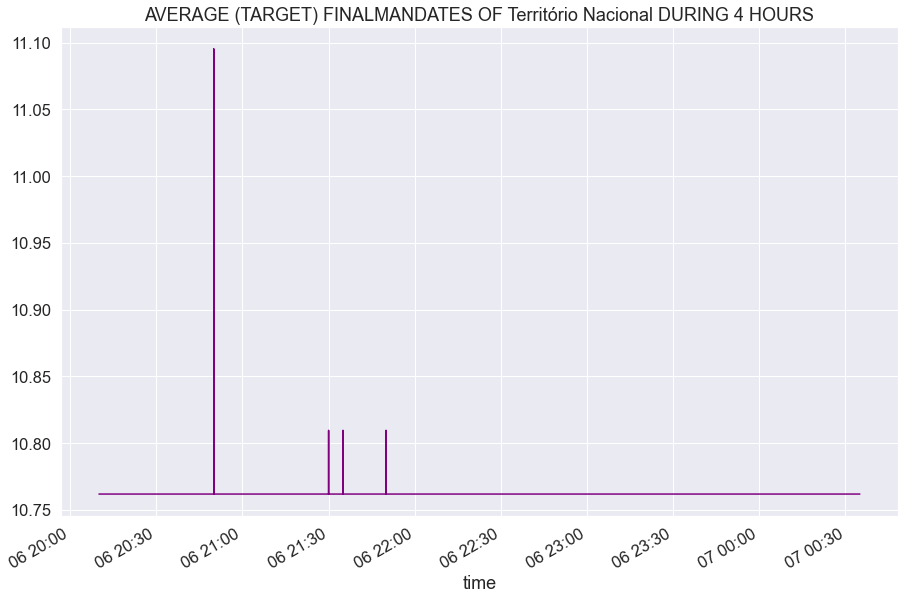

In [201]:
nacional_df["FinalMandates"].rolling(21).mean().plot(kind="line",color="purple").set(title="AVERAGE (TARGET) FINALMANDATES OF Território Nacional DURING 4 HOURS")

- the average of finalmandates in city that has the largest number of total mandates reached to 11 % in hour 9:00 pm 

- WHICH IS DOMINANT PARTY IN NUMBER OF VOTES ?

In [202]:
df2.groupby("Party").mean()["Votes"].sort_values(ascending=False)

Party
PS           117449.432121
PPD/PSD       91582.036380
B.E.          29748.878438
PCP-PEV       19408.574978
CDS-PP        13810.834073
PAN            9674.813665
CH             3992.018634
IL             3483.149068
L              3041.114463
R.I.R.         2544.698830
A              2289.987578
PCTP/MRPP      2161.291925
JPP            1685.374486
PNR             908.507542
NC              797.980453
MPT             794.132483
PURP            756.119342
PDR             602.318545
PTP             546.559372
PPM             523.599254
MAS             470.301176
Name: Votes, dtype: float64

[Text(0.5, 1.0, 'DISTRIBUTION BETWEEN ALL PARTIES AND THEIR VOTING DURING 2 DAY ')]

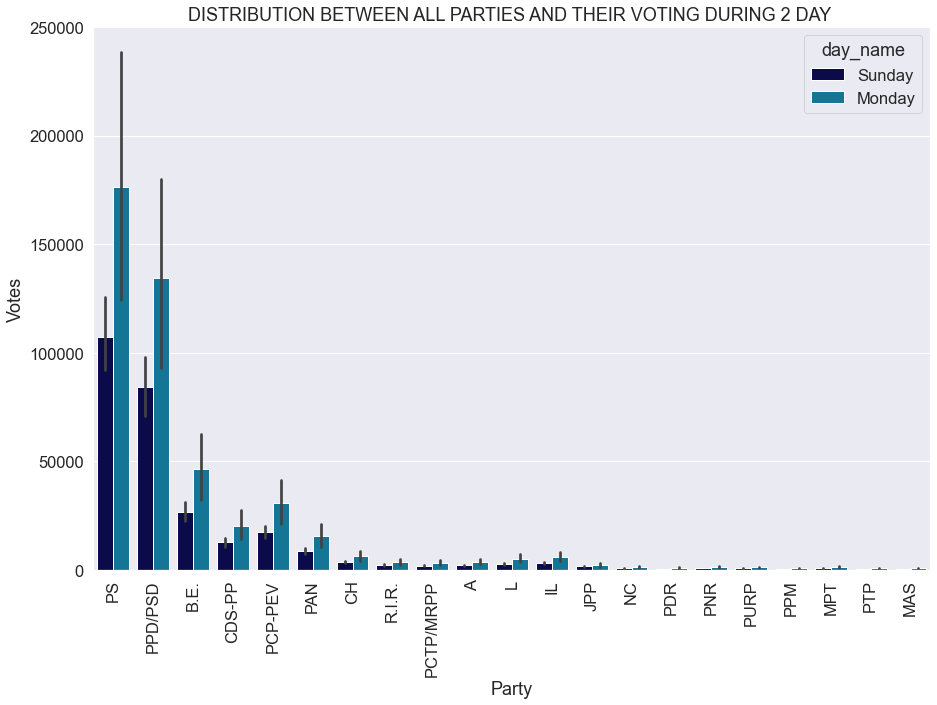

In [203]:
plt.xticks(rotation=90)
sns.barplot(data=df2,x="Party",y="Votes",hue="day_name",palette="ocean").set(title="DISTRIBUTION BETWEEN ALL PARTIES AND THEIR VOTING DURING 2 DAY ")

In [206]:
related_features=df2.corr()[["availableMandates","Mandates","Votes","Hondt","FinalMandates","actual_votes_currently","last_actual_votes"]]

In [207]:
related_features.drop(["year","month"],inplace=True)


- WHICH ARE THE CORRELATED FEATURES WITH OUR TARGET (FINAL MANDATES)?

<AxesSubplot:>

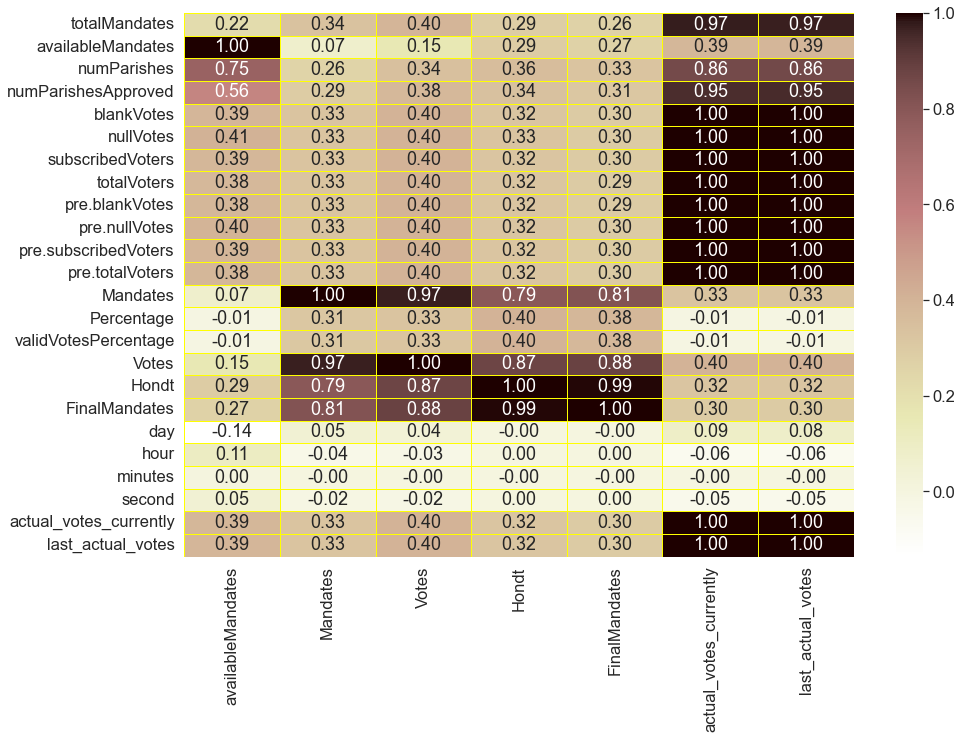

In [208]:
sns.heatmap(related_features,annot=True,fmt="0.2f",linewidths=0.5,linecolor="yellow",cmap="pink_r")

In [209]:
df2.index.unique()

DatetimeIndex(['2019-10-06 20:10:02', '2019-10-06 20:15:02',
               '2019-10-06 20:20:02', '2019-10-06 20:25:02',
               '2019-10-06 20:30:02', '2019-10-06 20:35:02',
               '2019-10-06 20:40:02', '2019-10-06 20:45:02',
               '2019-10-06 20:50:01', '2019-10-06 20:55:01',
               '2019-10-06 21:00:01', '2019-10-06 21:05:01',
               '2019-10-06 21:10:01', '2019-10-06 21:15:02',
               '2019-10-06 21:20:02', '2019-10-06 21:25:02',
               '2019-10-06 21:30:01', '2019-10-06 21:35:01',
               '2019-10-06 21:40:02', '2019-10-06 21:45:02',
               '2019-10-06 21:50:01', '2019-10-06 21:55:01',
               '2019-10-06 22:00:02', '2019-10-06 22:05:02',
               '2019-10-06 22:10:01', '2019-10-06 22:15:01',
               '2019-10-06 22:20:02', '2019-10-06 22:25:01',
               '2019-10-06 22:30:01', '2019-10-06 22:35:01',
               '2019-10-06 22:40:02', '2019-10-06 22:45:01',
               '2019-10-

In [237]:
df2.loc["2019-10-07 00:10:02",]

,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,hour,minutes,second,actual_votes_currently,last_actual_votes,territoryName_Açores,territoryName_Beja,territoryName_Braga,territoryName_Bragança,territoryName_Castelo Branco,territoryName_Coimbra,territoryName_Faro,territoryName_Guarda,territoryName_Leiria,territoryName_Lisboa,territoryName_Madeira,territoryName_Portalegre,territoryName_Porto,territoryName_Santarém,territoryName_Setúbal,territoryName_Território Nacional,territoryName_Viana do Castelo,territoryName_Vila Real,territoryName_Viseu,territoryName_Évora,Party_B.E.,Party_CDS-PP,Party_CH,Party_IL,Party_JPP,Party_L,Party_MAS,Party_MPT,Party_NC,Party_PAN,Party_PCP-PEV,Party_PCTP/MRPP,Party_PDR,Party_PNR,Party_PPD/PSD,Party_PPM,Party_PS,Party_PTP,Party_PURP,Party_R.I.R.,day_name_Sunday
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07 00:10:02,210,16,3092,3088,128360,87677,9227156,5024053,111410,85545,9323907,5307843,100,36.66,38.31,1841762,90,106,2019,10,7,0,10,2,9443193,9520862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2019-10-07 00:10:02,210,16,3092,3088,128360,87677,9227156,5024053,111410,85545,9323907,5307843,74,28.01,29.27,1407310,69,77,2019,10,7,0,10,2,9443193,9520862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2019-10-07 00:10:02,210,16,3092,3088,128360,87677,9227156,5024053,111410,85545,9323907,5307843,17,9.67,10.10,485657,23,19,2019,10,7,0,10,2,9443193,9520862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-10-07 00:10:02,210,16,3092,3088,128360,87677,9227156,5024053,111410,85545,9323907,5307843,10,6.36,6.65,319726,15,12,2019,10,7,0,10,2,9443193,9520862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2019-10-07 00:10:02,210,16,3092,3088,128360,87677,9227156,5024053,111410,85545,9323907,5307843,5,4.25,4.44,213621,10,5,2019,10,7,0,10,2,9443193,9520862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07 00:10:02,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,0,0.19,0.20,332,0,0,2019,10,7,0,10,2,356756,379798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2019-10-07 00:10:02,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,0,0.18,0.19,326,0,0,2019,10,7,0,10,2,356756,379798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2019-10-07 00:10:02,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,0,0.14,0.15,256,0,0,2019,10,7,0,10,2,356756,379798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [210]:
df1.index.unique()

Int64Index([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
             65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
            130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
            195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
            260, 265],
           dtype='int64', name='TimeElapsed')

- WHAT IS AVERAGE FINALMANDATES FOR EVERY 5 MINUTES ?

[Text(0.5, 1.0, 'CHANGED AVERAGE OF FINALMANDATES EACH 5 MINUTES DURING 4 HOURS ')]

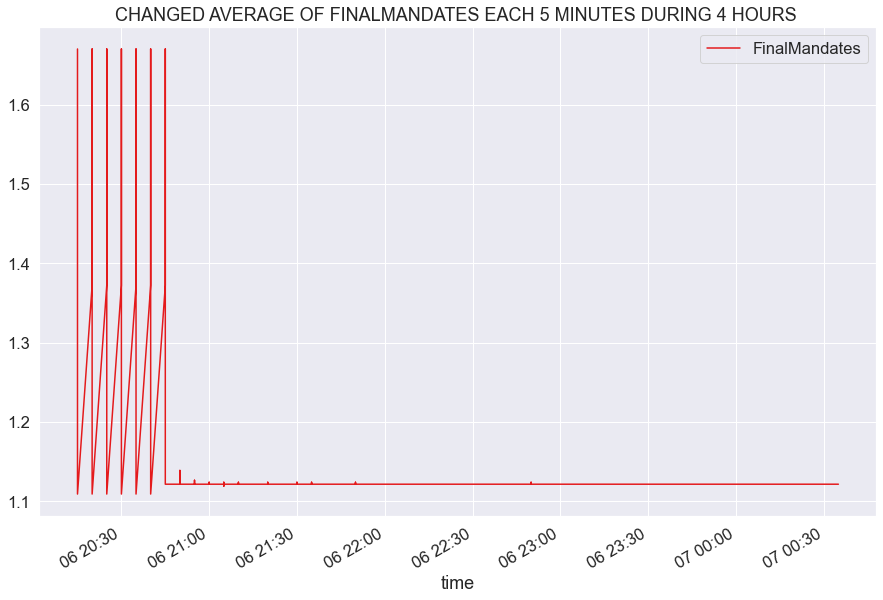

In [238]:
df2[["FinalMandates"]].rolling(403).mean().plot(kind="line",colormap="Set1").set(title="CHANGED AVERAGE OF FINALMANDATES EACH 5 MINUTES DURING 4 HOURS ")

-WHICH WAS FINALMANDATES CHANGING IN HOUR FROM (8:30) UNTIL(9:00)(this is the most period of FinalMandates that reached to high level )

[Text(0.5, 1.0, 'THE LARGEST AVERAGE FOR FINALMANDATES')]

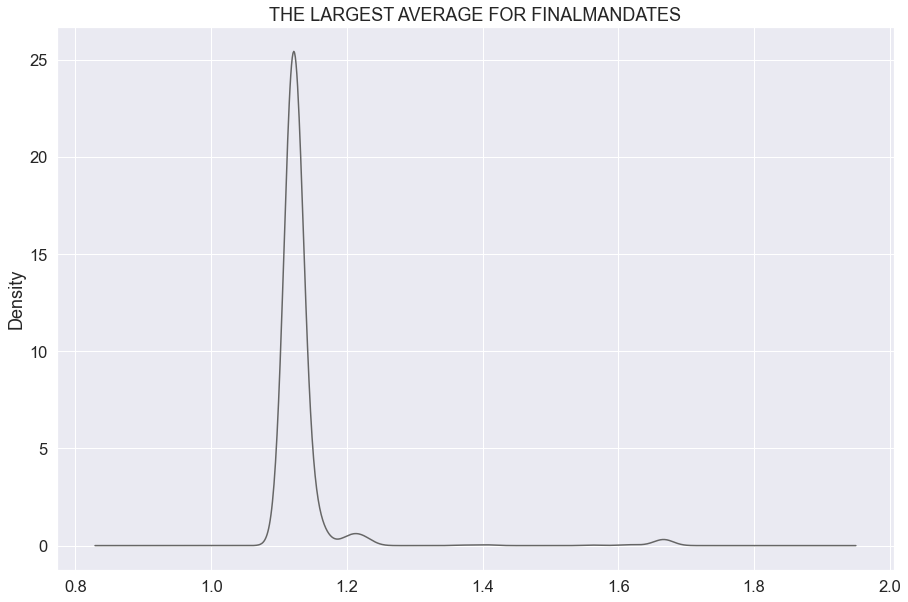

In [212]:
df2.loc['2019-10-06 20:30:02':"2019-10-06 21:00:01"]["FinalMandates"].rolling(403).mean().plot(kind="kde",colormap="Accent_r").set(title="THE LARGEST AVERAGE FOR FINALMANDATES")

[Text(0.5, 1.0, 'THE LEAST AVERAGE FOR FINALMANDATES')]

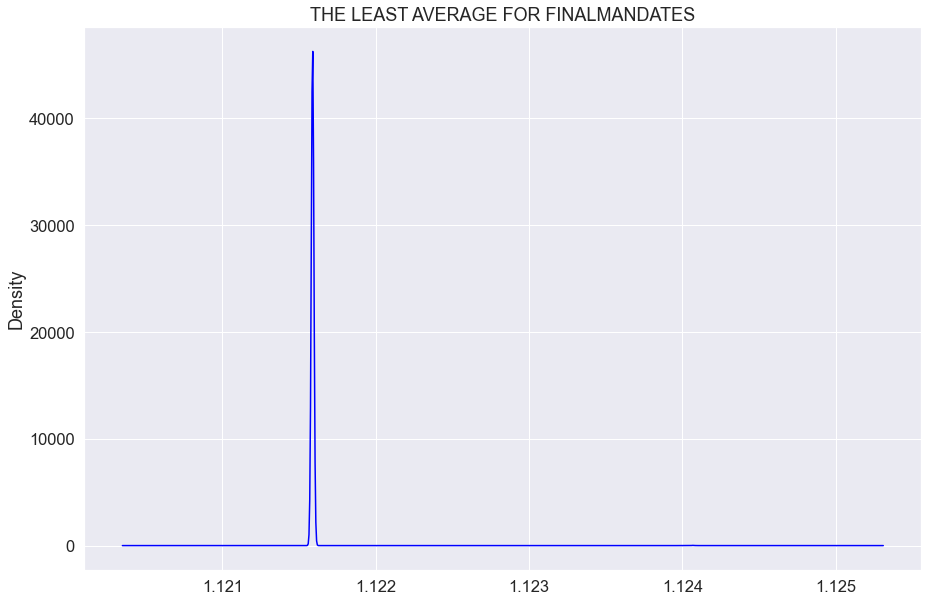

In [213]:
df2.loc['2019-10-06 21:30:01':"2019-10-06 23:00:01"]["FinalMandates"].rolling(403).mean().plot(kind="kde",colormap="brg").set(title="THE LEAST AVERAGE FOR FINALMANDATES")

- WHICH THE INFLUENTIAL PARTY ON THE TARGET?

[Text(0.5, 1.0, 'THE MOST INFLUENTIAL PARTY ON THE TARGET ')]

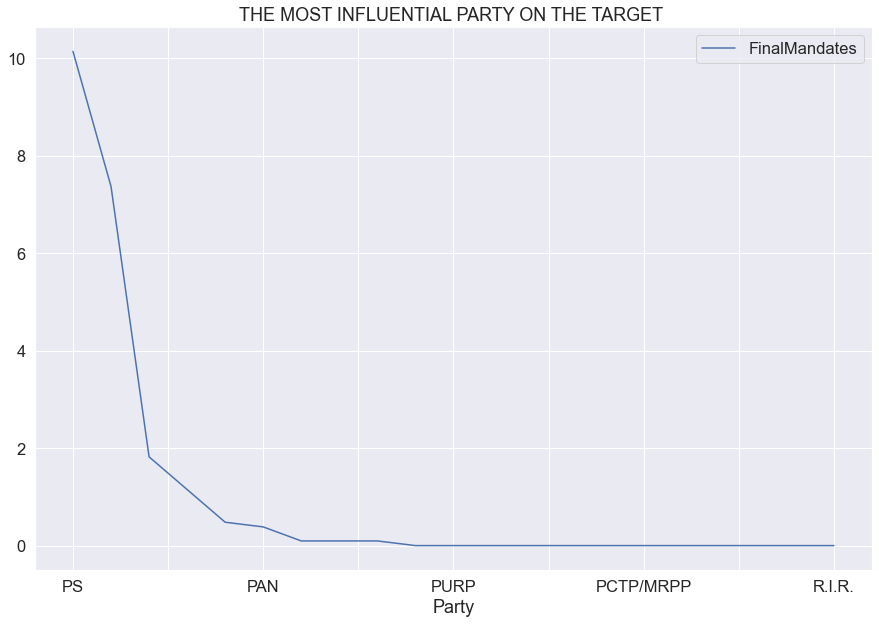

In [214]:
pd.pivot_table(data=df2,index="Party",values="FinalMandates",aggfunc=np.mean).sort_values(by="FinalMandates",ascending=False).plot(kind="line",).set(title="THE MOST INFLUENTIAL PARTY ON THE TARGET ")

- WHAT IS DISTRIBUTION OF FINALMANDATES(TARGET) ACCORDING TO EACH PARTY AND EACH CITY ?

In [215]:
pd.pivot_table(data=df2,index="territoryName",columns="Party",values="FinalMandates",aggfunc=np.mean)

Party,A,B.E.,CDS-PP,CH,IL,JPP,L,MAS,MPT,NC,PAN,PCP-PEV,PCTP/MRPP,PDR,PNR,PPD/PSD,PPM,PS,PTP,PURP,R.I.R.
territoryName,,,,,,,,,,,,,,,,,,,,,
Aveiro,0.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,0.0,0.0,0.0
Açores,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,NaN,NaN
Beja,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,NaN
Braga,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0
Bragança,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
Castelo Branco,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
Coimbra,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,NaN,0.0,0.0
Faro,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0
Guarda,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0


[Text(0.5, 1.0, 'DISTRIBUTION FINAL MANDATES(TARGET) FOR BOTH PARTY AND CITY ')]

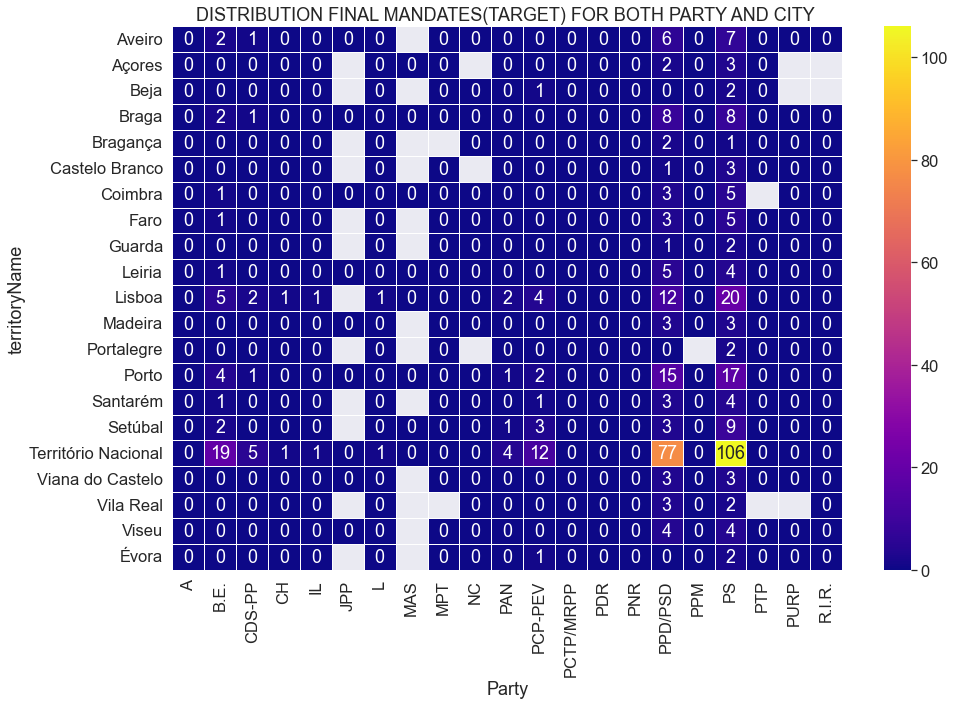

In [216]:
sns.heatmap(pd.pivot_table(data=df2,index="territoryName",columns="Party",values="FinalMandates",aggfunc=np.mean),annot=True,fmt="0.0f",linewidth=0.5,cmap="plasma").set(title="DISTRIBUTION FINAL MANDATES(TARGET) FOR BOTH PARTY AND CITY ")

- the largest average of finalmandates(target) according to every cities is 106 % represented for called (PS)party in called city (territori nacional) , 17 % represented for the same party (PS) in called city (POTRO)
- the second party of  distributed finalmandates average represented for called (B.E.) party in (Território Nacional) city 
- the third party represented for a nice average of finalmandates equaled 77 % called party (PPD/PSD) in (nacional) city
- finally (PCP-PEV) represented average of finalmandates around 12% in (Território Nacional) city

- DOES CURRENT SUBSCRIBED VOTERS LOOK LIKE THE LAST ONE ?  

[Text(0.5, 1.0, 'DIFFERENCE BETWEEN AVERAGE LAST SUBSCRIBED VOTES & CURRENT SUBSCRIBED VOTES FOR EVERY FIVE MINUTES')]

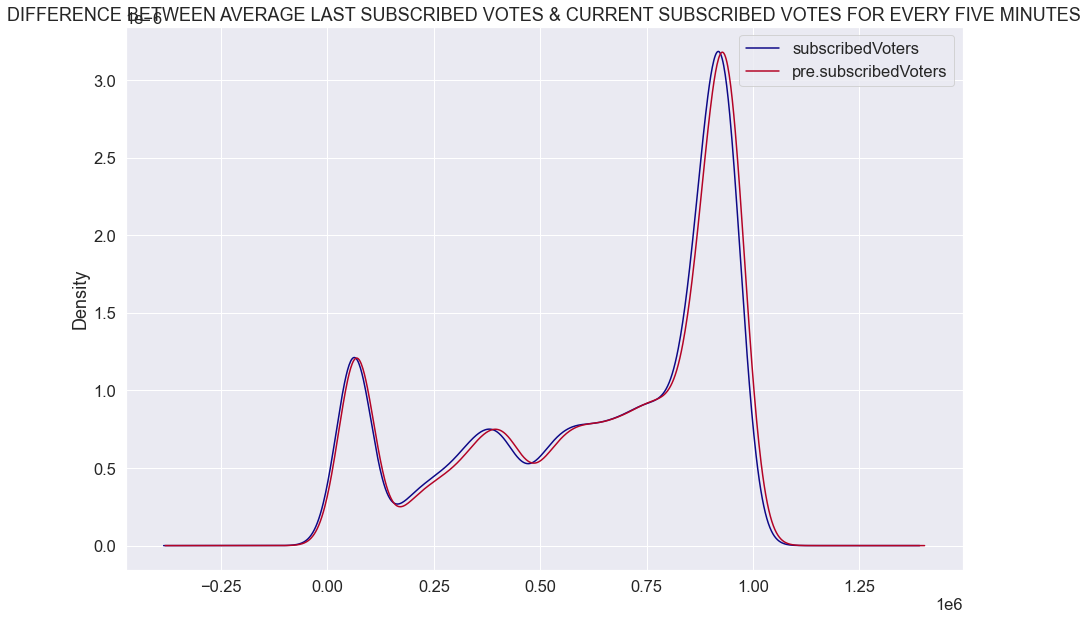

In [217]:
df2["subscribedVoters"].rolling(403).mean().plot(kind="kde",colormap="plasma",legend=True)
df2["pre.subscribedVoters"].rolling(403).mean().plot(kind="kde",colormap="coolwarm_r",legend=True).set(title="DIFFERENCE BETWEEN AVERAGE LAST SUBSCRIBED VOTES & CURRENT SUBSCRIBED VOTES FOR EVERY FIVE MINUTES")


In [219]:
df2.columns

Index(['territoryName', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
       'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
       'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates',
       'Percentage', 'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates',
       'year', 'month', 'day', 'day_name', 'hour', 'minutes', 'second',
       'actual_votes_currently', 'last_actual_votes'],
      dtype='object')

In [220]:
df2.index.unique()

DatetimeIndex(['2019-10-06 20:10:02', '2019-10-06 20:15:02',
               '2019-10-06 20:20:02', '2019-10-06 20:25:02',
               '2019-10-06 20:30:02', '2019-10-06 20:35:02',
               '2019-10-06 20:40:02', '2019-10-06 20:45:02',
               '2019-10-06 20:50:01', '2019-10-06 20:55:01',
               '2019-10-06 21:00:01', '2019-10-06 21:05:01',
               '2019-10-06 21:10:01', '2019-10-06 21:15:02',
               '2019-10-06 21:20:02', '2019-10-06 21:25:02',
               '2019-10-06 21:30:01', '2019-10-06 21:35:01',
               '2019-10-06 21:40:02', '2019-10-06 21:45:02',
               '2019-10-06 21:50:01', '2019-10-06 21:55:01',
               '2019-10-06 22:00:02', '2019-10-06 22:05:02',
               '2019-10-06 22:10:01', '2019-10-06 22:15:01',
               '2019-10-06 22:20:02', '2019-10-06 22:25:01',
               '2019-10-06 22:30:01', '2019-10-06 22:35:01',
               '2019-10-06 22:40:02', '2019-10-06 22:45:01',
               '2019-10-

- WHAT DIFFERENCE BEWTEEN PERCENTAGE LAST TOTAL VOTES AND CURRENT VOTES EVERY HOUR ?

<AxesSubplot:xlabel='time'>

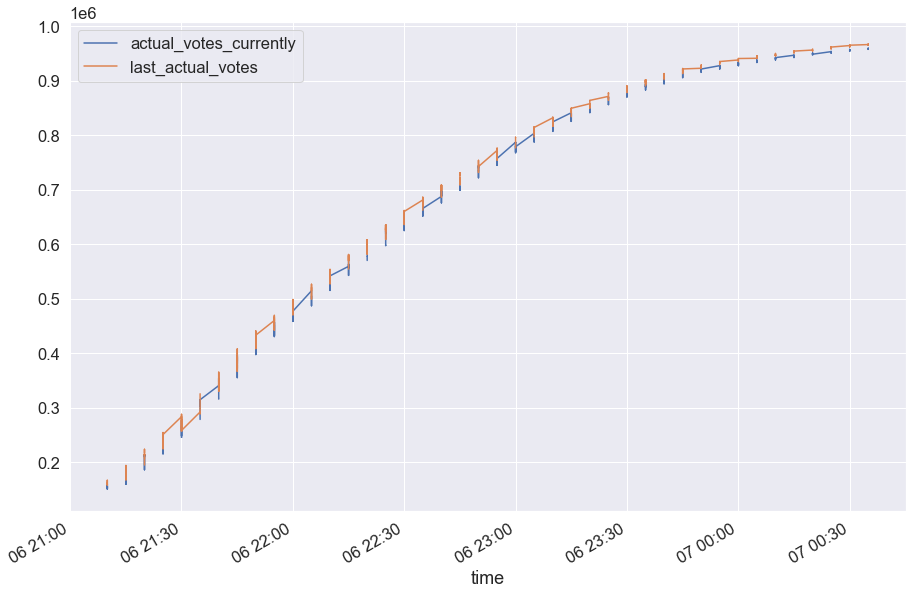

In [221]:
pd.concat([df2[["actual_votes_currently"]].rolling(4836).mean(),df2[["last_actual_votes"]].rolling(4836).mean()]).plot(kind="line")

-it's noticeable that average of last actual votes was increasing every hour ,but current actual votes is less than last one \
-two lines get together (last / current) between (21:00) to (21:45)

In [222]:
df2.columns

Index(['territoryName', 'totalMandates', 'availableMandates', 'numParishes',
       'numParishesApproved', 'blankVotes', 'nullVotes', 'subscribedVoters',
       'totalVoters', 'pre.blankVotes', 'pre.nullVotes',
       'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates',
       'Percentage', 'validVotesPercentage', 'Votes', 'Hondt', 'FinalMandates',
       'year', 'month', 'day', 'day_name', 'hour', 'minutes', 'second',
       'actual_votes_currently', 'last_actual_votes'],
      dtype='object')

-WAS A RELATIONSHIP BETWEEN NUMBER OF REPRESENTATIVE ACCORDING TO DISTRIBUTION OF VOTES AND FINAL REPRESENTATIVE ?

[Text(0.5, 1.0, 'CORRELATION BETWEEN NUMBER OF DISTRIBUTED REPRESENTATIVES & FINAL REPRESENTATIVE')]

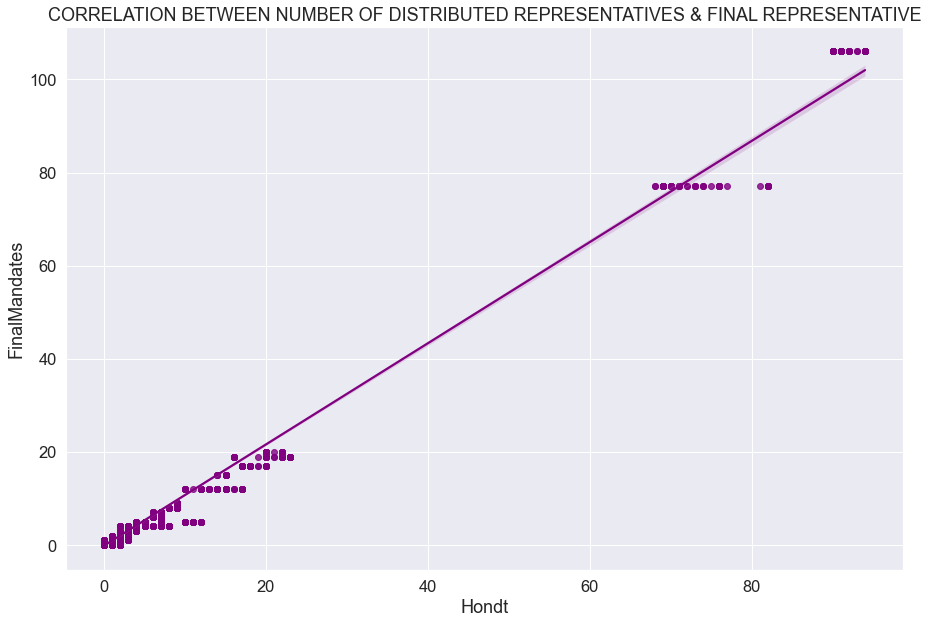

In [223]:
sns.regplot(data=df2,x="Hondt",y="FinalMandates",color="purple").set(title="CORRELATION BETWEEN NUMBER OF DISTRIBUTED REPRESENTATIVES & FINAL REPRESENTATIVE")

-it was a strong linear corelation between ditributed votes and final representative 

In [224]:
df2

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,nullVotes,subscribedVoters,totalVoters,pre.blankVotes,pre.nullVotes,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,year,month,day,day_name,hour,minutes,second,actual_votes_currently,last_actual_votes
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PS,0,38.29,40.22,147993,94,106,2019,10,6,Sunday,20,10,2,771055,830231
2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,2019,10,6,Sunday,20,10,2,771055,830231
2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,B.E.,0,6.81,7.15,26307,16,19,2019,10,6,Sunday,20,10,2,771055,830231
2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,2019,10,6,Sunday,20,10,2,771055,830231
2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,8874,752529,386497,8317,8171,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,2019,10,6,Sunday,20,10,2,771055,830231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07 00:35:01,Viseu,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,NC,0,0.19,0.20,332,0,0,2019,10,7,Monday,0,35,1,356756,379798
2019-10-07 00:35:01,Viseu,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,PNR,0,0.18,0.19,326,0,0,2019,10,7,Monday,0,35,1,356756,379798
2019-10-07 00:35:01,Viseu,8,0,277,277,4995,3700,348061,177647,4235,3632,371931,190712,MPT,0,0.14,0.15,256,0,0,2019,10,7,Monday,0,35,1,356756,379798


In [225]:
cat_col=df2.select_dtypes(include="object").columns
cat_col

Index(['territoryName', 'Party', 'day_name'], dtype='object')

In [226]:
df2=pd.get_dummies(data=df2,columns=cat_col,drop_first=True)

In [227]:
outliers_df=df2[(df2>maximum_outliers)|(df2>upper_availableMandates)|(df2>maxmum_outliers_parishes)|(df2>pre_maxoutlier)|(df2>pre_maxblank)|(df2>pre_maxout_null)|(df2>upper_subscribedVoters)|(df2>upper_totalvo)|(df2>upper_pre_blank)|(df2==0)|(df2>upper_prenullVotes)|(df2>upper_pre_subscribedVoters)|(df2<=upper_pre_totalvoters)|(df2>upper_votes)|(df2>up_hondt)|(df2>out_final)]

In [228]:
outliers_df.to_csv("outlier_df",index=False)

In [229]:
without_outliers_df=df2[(df2<=maximum_outliers)|(df2<=upper_availableMandates)|(df2<=maxmum_outliers_parishes)|(df2<=pre_maxoutlier)|(df2<=pre_maxblank)|(df2<=pre_maxout_null)|(df2<=upper_subscribedVoters)|(df2<=upper_totalvo)|(df2<=upper_pre_blank)|(df2>0)|(df2<=upper_prenullVotes)|(df2<=upper_pre_subscribedVoters)|(df2<=upper_pre_totalvoters)|(df2<=upper_votes)|(df2<=up_hondt)|(df2<=out_final)]

In [230]:
without_outliers_df.to_csv("without_outliers_df",index=False)